# Laboratório de Simulações Numéricas (PME3201)

## Quarta Experiência: Dinâmica do Ponto

#### Lucas Carvalho, Engenharia Mecânica (2023)

#### Preparação do Ambiente

- matplotlib para apresentação gráfica
- numpy para operações de álgebra linear
- scipy para a integração numérica

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import sympy as sp

### 1) Primeiro Problema


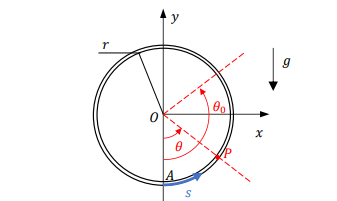

O sistema acima pode ser modelado pela seguinte equação diferencial:

$$
    \ddot{\Theta} + \frac{g}{r}sin(\Theta) = 0
$$

#### a) Espaço  de Estados

Em forma de espaço de estados, por substituição de variáveis, tem-se o seguinte:

\begin{equation}
    \begin{aligned}
        x_1 = \Theta \\
        x_2 = \dot{\Theta}\\\\

        \dot{x_1} = x_2 \\
        \dot{x_2} = -\frac{g}{r}sin(x_1)
    \end{aligned}
\end{equation}

In [2]:
def model(t, z):
    theta, omega = z 
    domegadt = -(g/r)*np.sin(theta)
    
    return [omega, domegadt]

#### Definição de Parâmetros

In [3]:
rho = 8940  # kg/m^3
r_p = 0.001 # m 
r = 1 # m
g = 9.8 # m/s^2

#### b) Função de Integração

Uma função equivalente está na biblioteca solve_ivp do Python, com o método de Runge-Kutta de terceira ordem

#### c) Simulações

##### Definição das Condições Iniciais

In [4]:
theta_0 = [np.radians(-1), 2*np.pi/3, np.radians(179)]
omega_0 = [0, 0, 0]
z0 = list(zip(theta_0, omega_0)) # zip de vetores para condições iniciais

Integração

In [5]:
# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos
sol = []

for n in range(3):
    solution = solve_ivp(model, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol

Plot dos Resultados

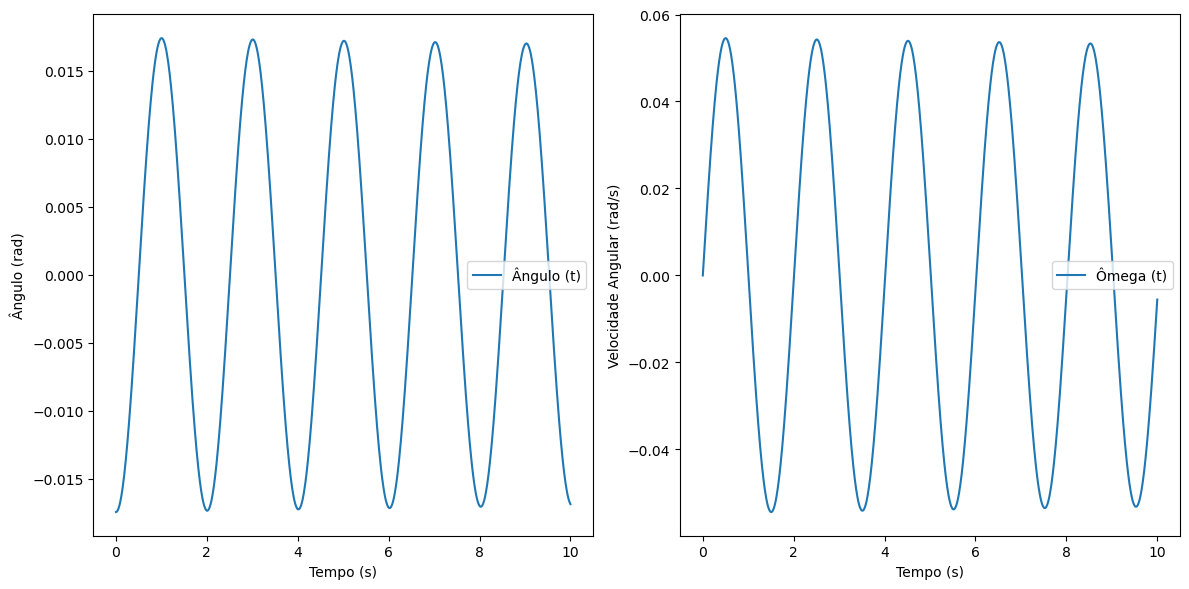

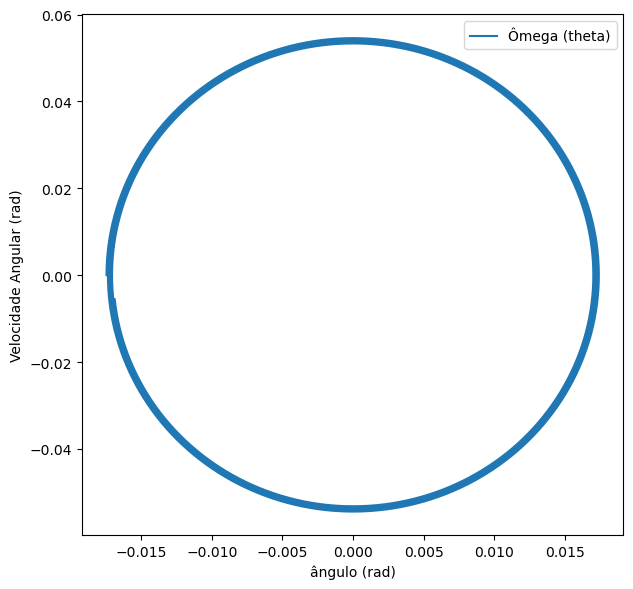

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[0].t, sol[0].y[0], label='Ângulo (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[0].t, sol[0].y[1], label='Ômega (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[0].y[0], sol[0].y[1], label='Ômega (theta)')
plt.xlabel('ângulo (rad)')
plt.ylabel('Velocidade Angular (rad)')
plt.legend()

plt.tight_layout()
plt.show()

Definição das Condições Iniciais do segundo caso

Plot dos Resultados

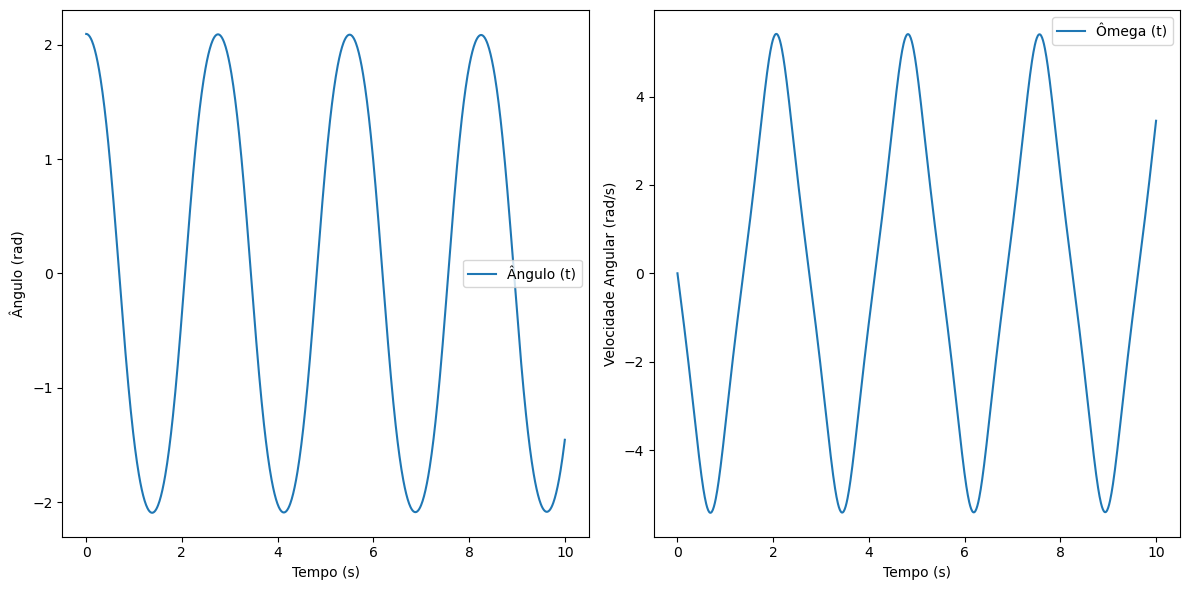

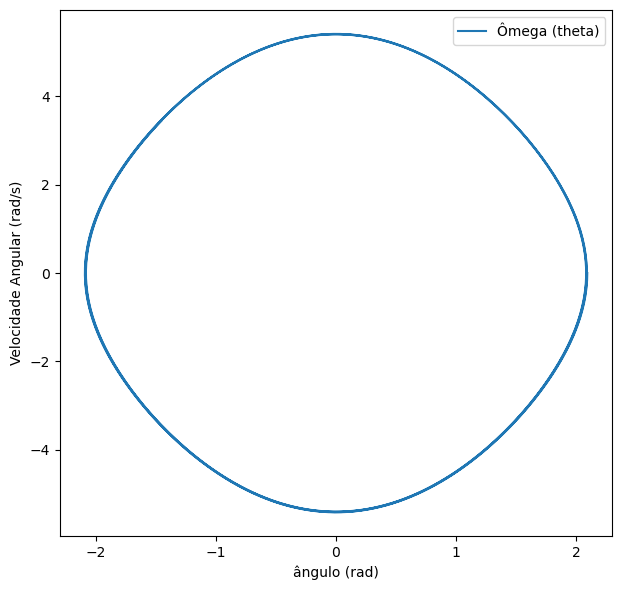

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[1].t, sol[1].y[0], label='Ângulo (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[1].t, sol[1].y[1], label='Ômega (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[1].y[0], sol[1].y[1], label='Ômega (theta)')
plt.xlabel('ângulo (rad)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

Verifica-se que, à medida que o ângulo aumenta, a solução se aproxima de uma elipse no plano de fase

Plot dos Resultados

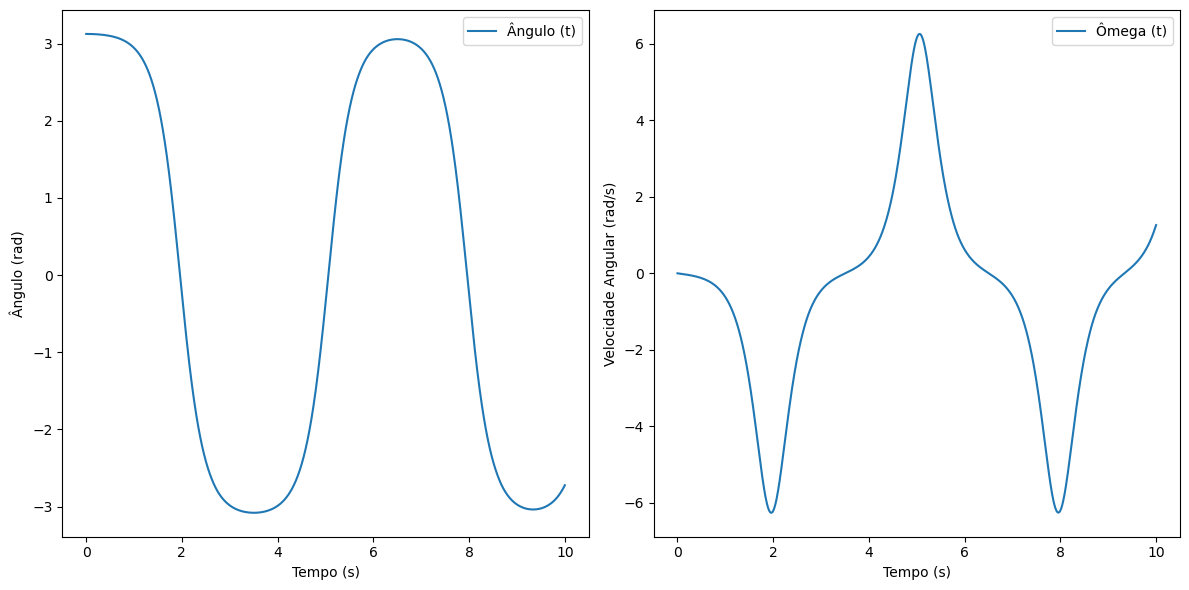

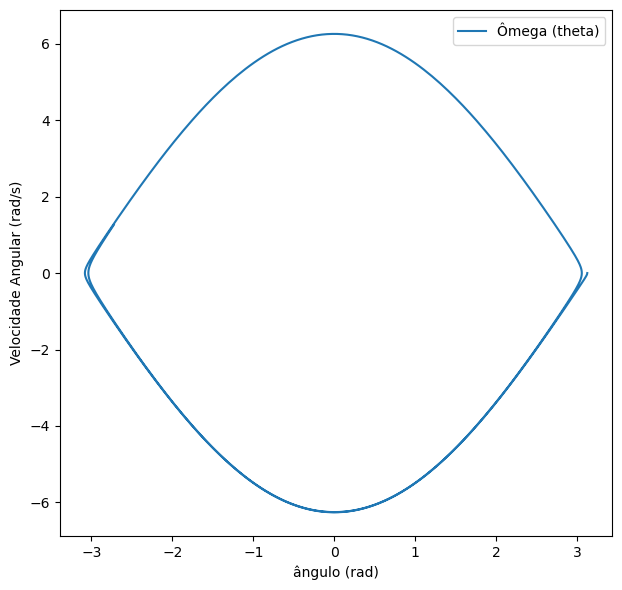

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[2].t, sol[2].y[0], label='Ângulo (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[2].t, sol[2].y[1], label='Ômega (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[2].y[0], sol[2].y[1], label='Ômega (theta)')
plt.xlabel('ângulo (rad)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

Gráfico das Energias

Em relação à Energia Potencial:

$$
    V = mgr(1 - cos \left(\Theta \right)) 
$$

Não há dados sobre a massa, senão da sua densidade: $m=\rho v$ e raio (volume): $v = \frac{4}{3}\pi r_p^3$

$$
    V = \rho \frac{4}{3} \pi r_p^3 r (1 - cos \left(\Theta) \right)
$$

Em relação à Energia Cinética:


$$
    T = \frac{1}{2}mr^2 \dot{\Theta}^2
$$

Analogamente:

$$
    T = \frac{2}{3} \rho \pi r_p^3 r^2 \dot{\Theta}^2
$$

Com isso, a nergia final do sistema fica:

$$
    E = \frac{\rho \pi r_p^3}{3} \left(4 r (1 - cos \left(\Theta) \right) + 2 r^2 \dot{\Theta}^2 \right)
$$

Primeira Situação

In [9]:
# Função para calcular a energia potencial
def potential_energy(theta):
    return m * g * r * (1 - np.cos(theta))

# Função para calcular a energia cinética
def kinetic_energy(omega):
    return (1/2) * m * (r**2) * (omega**2)

# Calcular as energias para cada solução
energies = []
for n in range(3):
    theta_values = sol[n].y[0]  # valores de theta a partir da solução
    omega_values = sol[n].y[1]  # valores de omega a partir da solução
    
    m = rho * (4/3) * np.pi * r_p**3  # massa da esfera
    
    potential_energies = potential_energy(theta_values)
    kinetic_energies = kinetic_energy(omega_values)
    total_energies = potential_energies + kinetic_energies
    
    energies.append([potential_energies, kinetic_energies, total_energies])

Primeiro Caso

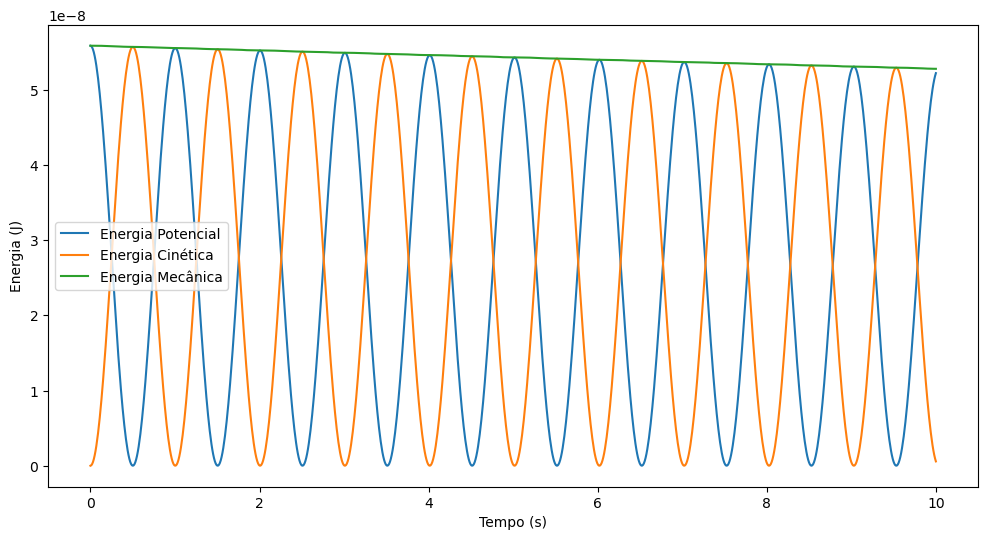

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(sol[0].t, energies[0][0], label='Energia Potencial')
plt.plot(sol[0].t, energies[0][1], label='Energia Cinética')
plt.plot(sol[0].t, energies[0][2], label='Energia Mecânica')

plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend()
plt.show()

Segundo Caso

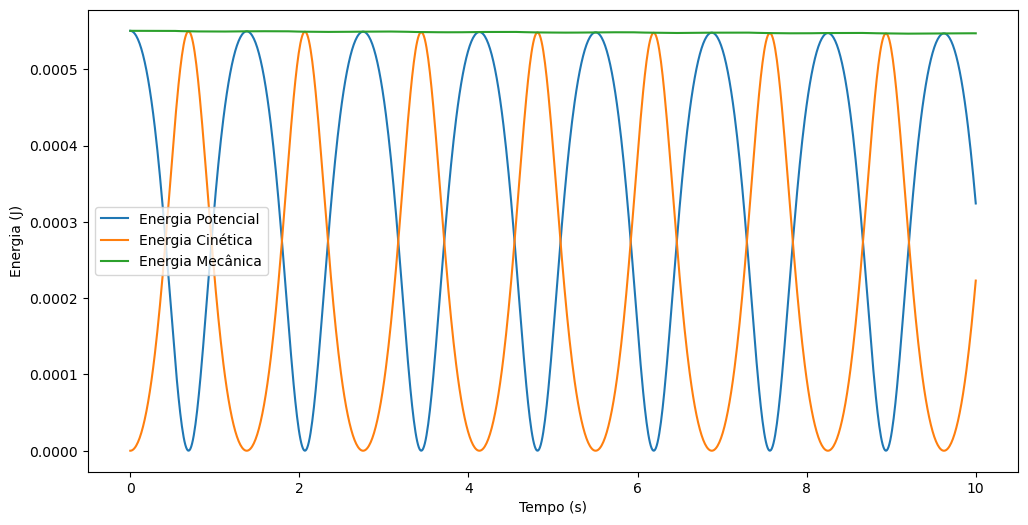

In [11]:
plt.figure(figsize=(12, 6))

plt.plot(sol[1].t, energies[1][0], label='Energia Potencial')
plt.plot(sol[1].t, energies[1][1], label='Energia Cinética')
plt.plot(sol[1].t, energies[1][2], label='Energia Mecânica')

plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend()
plt.show()

Terceiro Caso

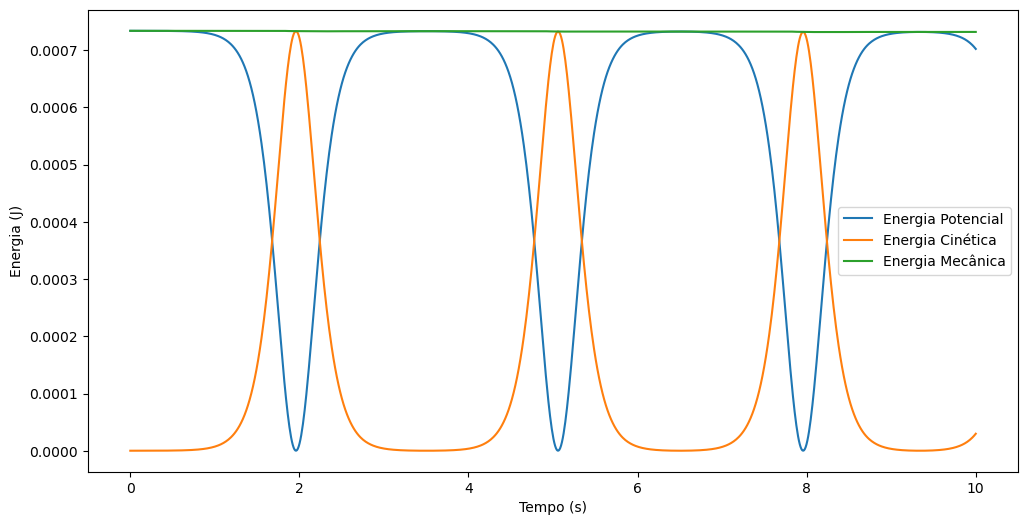

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(sol[2].t, energies[2][0], label='Energia Potencial')
plt.plot(sol[2].t, energies[2][1], label='Energia Cinética')
plt.plot(sol[2].t, energies[2][2], label='Energia Mecânica')

plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend()
plt.show()

#### d) Função Elementar de Derivação

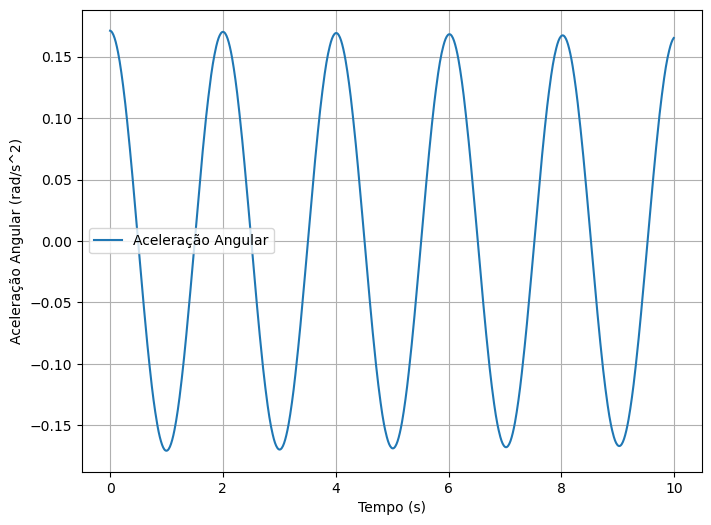

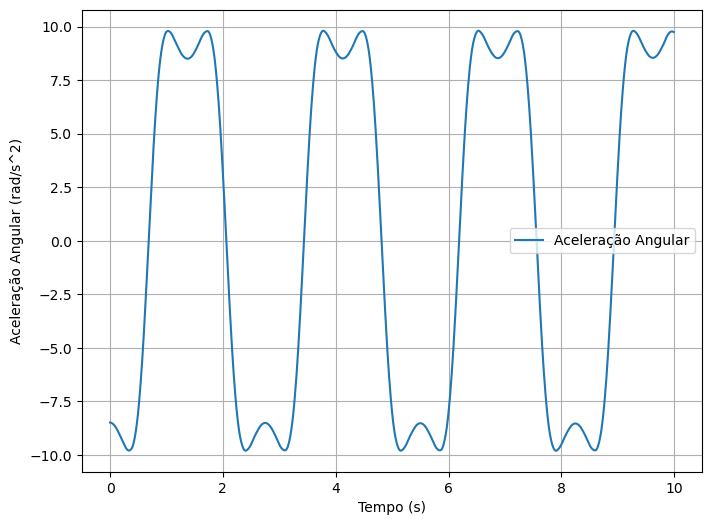

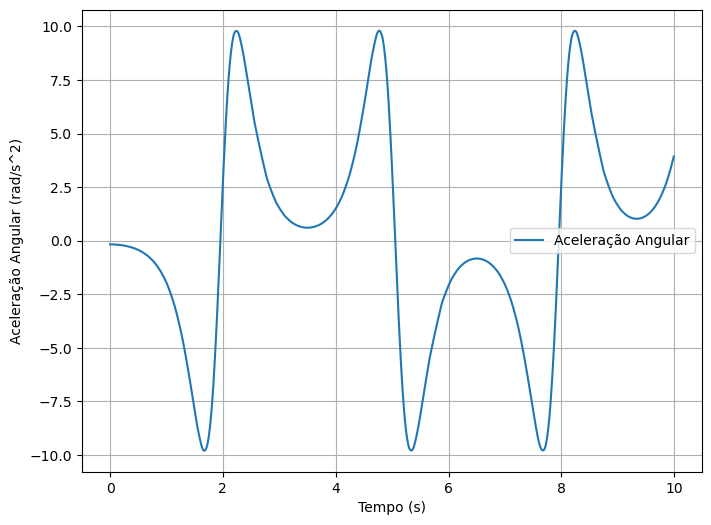

In [13]:
# Calculando a aceleração angular usando diferenças finitas

for solution in sol:
    t = solution.t
    omega = solution.y[1]
    delta_t = t[1] - t[0]  # Intervalo de tempo entre pontos
    acceleration = np.diff(omega) / delta_t  # Aceleração usando diferenças finitas

    # Removendo o último ponto de t para ter a mesma dimensão que a aceleração
    t = t[:-1]

    # Plotando a aceleração angular
    plt.figure(figsize=(8, 6))
    plt.plot(t, acceleration, label='Aceleração Angular')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Aceleração Angular (rad/s^2)')
    plt.legend()
    plt.grid(True)
    plt.show()

### 2) Segundo Problema

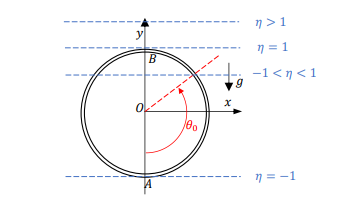

A equação governante que será analisada é a seguinte

$$
\phi(t) = \left(\frac{d \Theta}{dt} \right)^2 = 2 \omega^2(\eta + cos (\Theta))
$$

#### a) Gráfico de Relação

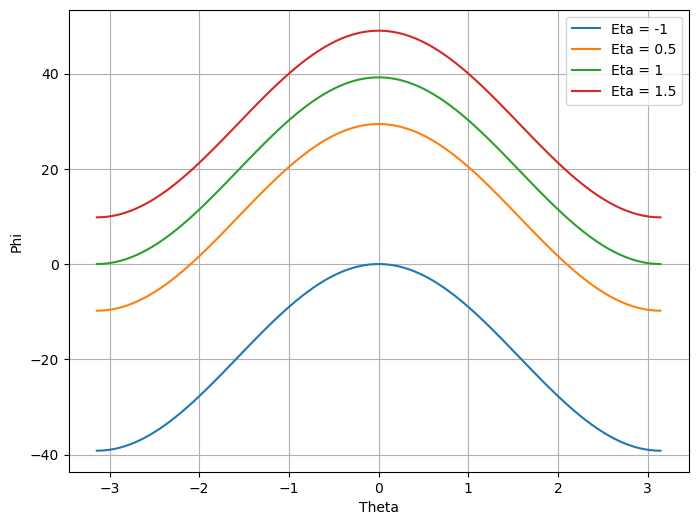

In [14]:
def phi(eta, theta):
    return (2 * g)/(r)*(eta + np.cos(theta))

etas = [-1, 0.5, 1, 1.5]
thetas = np.linspace(-np.pi, np.pi, 100)

plt.figure(figsize=(8, 6))  # Cria uma figura para todos os gráficos
for eta in etas:
    phis = []
    for angle in thetas:
        phis.append(phi(eta, angle))
    plt.plot(thetas, phis, label=f'Eta = {eta}')

plt.xlabel('Theta')
plt.ylabel('Phi')
plt.legend()
plt.grid(True)
plt.show()

#### b) Simulações

Primeiramente, seguindo metodologia apresentada, tem-se o seguinte:

\begin{equation}
    \begin{aligned}
        \ddot{\Theta} = \frac{g}{r} (- sen \left(\Theta \right))
    \end{aligned}
\end{equation}

Definindo os cenários de simulação e aplicando o processo de integração

In [15]:
# Modelo para esse caso:

theta_0 = [0, np.pi]
omega_0 = [0, 0]
z0 = list(zip(theta_0, omega_0)) # zip de vetores para condições iniciais


# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos
sol = []

for n in range(2):
    if (z0[n][0] == np.pi):
        solution = solve_ivp(model, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    else:
        solution = solve_ivp(model, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol


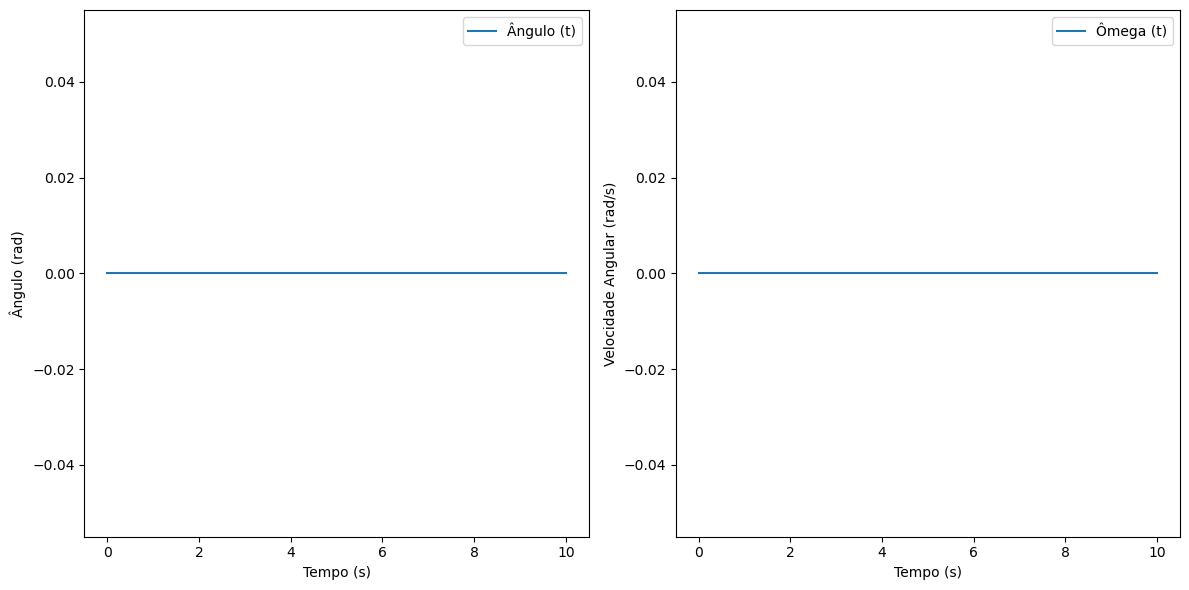

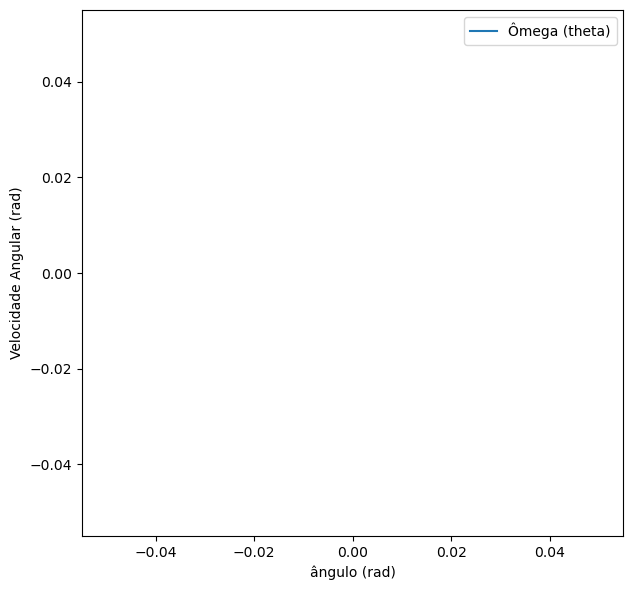

In [16]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[0].t, sol[0].y[0], label='Ângulo (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[0].t, sol[0].y[1], label='Ômega (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[0].y[0], sol[0].y[1], label='Ômega (theta)')
plt.xlabel('ângulo (rad)')
plt.ylabel('Velocidade Angular (rad)')
plt.legend()

plt.tight_layout()
plt.show()

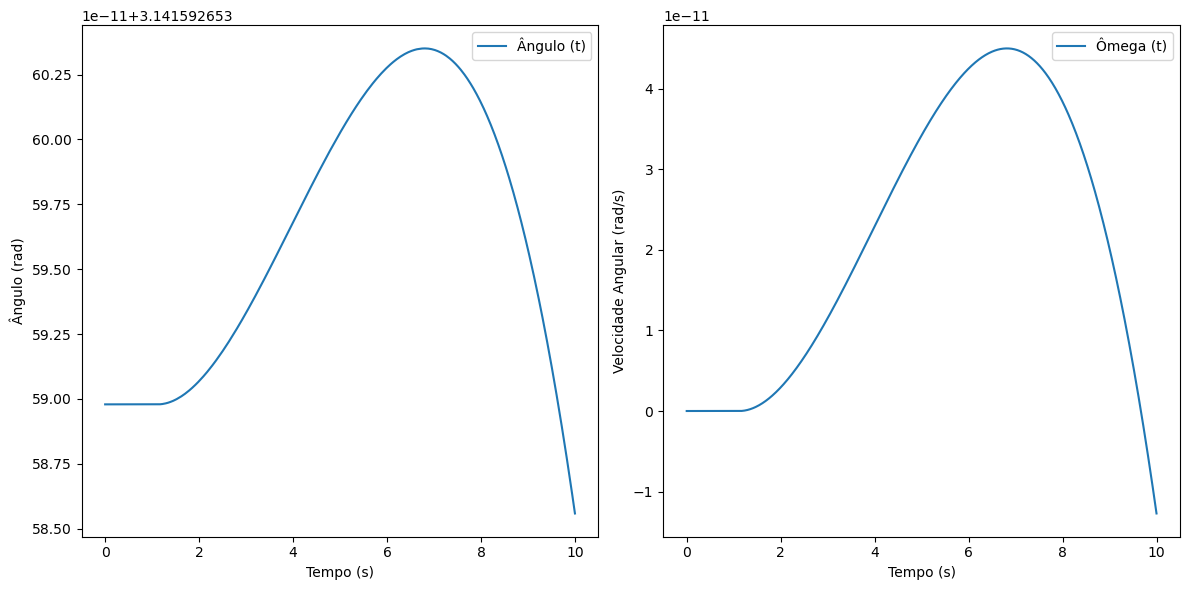

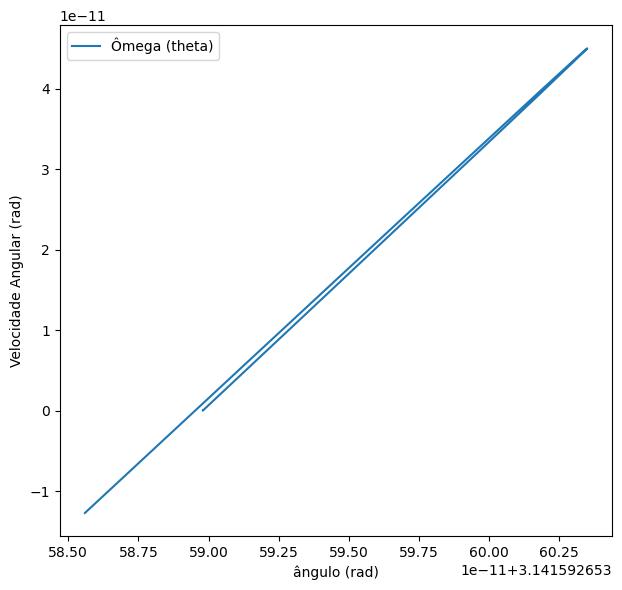

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[1].t, sol[1].y[0], label='Ângulo (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[1].t, sol[1].y[1], label='Ômega (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[1].y[0], sol[1].y[1], label='Ômega (theta)')
plt.xlabel('ângulo (rad)')
plt.ylabel('Velocidade Angular (rad)')
plt.legend()

plt.tight_layout()
plt.show()

#### c) Instante de Início de Movimento

In [18]:
# Condição inicial para theta = pi
z0 = [np.pi, 0]

# Métodos de integração numérica
integration_methods = ['RK23', 'BDF']

# Encontrar o instante de início do movimento para cada método
for method in integration_methods:
    sol = solve_ivp(model, [0, 100], z0, method=method, dense_output=True)
    t_values = sol.t
    theta_values = sol.y[0]
    omega_values = sol.y[1]
    
    start_time = None
    for i in range(1, len(t_values)):
        if omega_values[i] > 0 and omega_values[i - 1] <= 0:
            start_time = t_values[i]
            break
    
    print(f'Instante de início do movimento ({method}): {start_time} segundos')

Instante de início do movimento (RK23): 30.38230238354177 segundos
Instante de início do movimento (BDF): 9.559752048938682 segundos


##### d) Compatibilidade da Velocidade Angular

In [19]:
# Velocidade angular inicial para um movimento limitado no espaço
dot_theta_initial = np.sqrt(2 * g / r)
print(dot_theta_initial)

# Condições iniciais
theta_0 = 0
omega_0 = dot_theta_initial
z0 = [theta_0, omega_0]

# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos
sol = solve_ivp(model, t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))


4.427188724235731


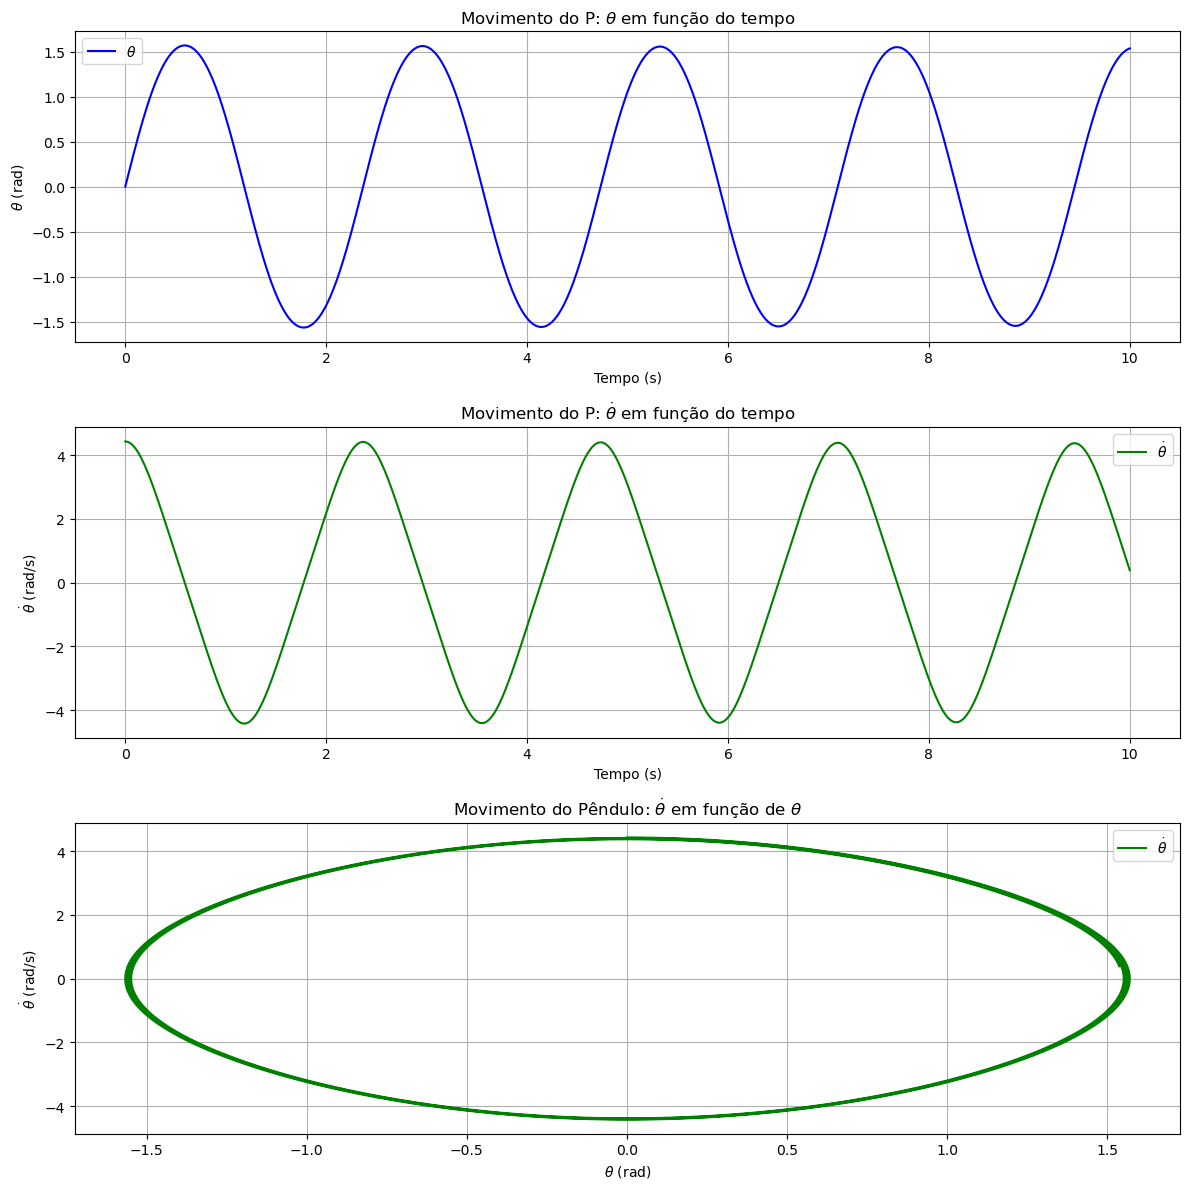

In [20]:
# Extração dos resultados
t_values = sol.t
theta_values = sol.y[0]
omega_values = sol.y[1]

# Gráficos
plt.figure(figsize=(12, 12))

# Gráfico de theta em função do tempo
plt.subplot(3, 1, 1)
plt.plot(t_values, theta_values, color='b', label=r'$\theta$')
plt.xlabel('Tempo (s)')
plt.ylabel(r'$\theta$ (rad)')
plt.title(r'Movimento do P: $\theta$ em função do tempo')
plt.grid(True)
plt.legend()

# Gráfico de velocidade angular em função do tempo
plt.subplot(3, 1, 2)
plt.plot(t_values, omega_values, color='g', label=r'$\dot{\theta}$')
plt.xlabel('Tempo (s)')
plt.ylabel(r'$\dot{\theta}$ (rad/s)')
plt.title(r'Movimento do P: $\dot{\theta}$ em função do tempo')
plt.grid(True)
plt.legend()

# Gráfico de velocidade angular em função de theta
plt.subplot(3, 1, 3)
plt.plot(theta_values, omega_values, color='g', label=r'$\dot{\theta}$')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$\dot{\theta}$ (rad/s)')
plt.title(r'Movimento do Pêndulo: $\dot{\theta}$ em função de $\theta$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 3) Terceiro Problema

##### a) Período de Oscilação

In [65]:
# Valores iniciais
theta0 = np.array([1*np.pi/180, 30*np.pi/180, 45*np.pi/180, 90*np.pi/180, 135*np.pi/180, 179*np.pi/180, 179.5*np.pi/180])
thetap0 = 0

# Função para o período
def periodo(theta, a):
    return r / (np.sqrt(2 * g * (a + r * np.cos(theta))))

periods = []

# Loop sobre os valores iniciais de theta0
for i in range(len(theta0)):
    a = (r * thetap0)**2 / (2 * g) - r * np.cos(theta0[i])

    # Limites de integração
    LI = -np.abs(np.arccos(-a/r))
    LS = np.abs(np.arccos(-a/r))

    # Integração numérica
    P, _ = quad(periodo, LI, LS, args=(a,))
    periods.append(P)

    
    print(f"Para theta0 = {np.degrees(theta0[i])} graus, o período é: {P:.4f} segundos")

Para theta0 = 1.0 graus, o período é: 1.0036 segundos
Para theta0 = 29.999999999999996 graus, o período é: 1.0210 segundos
Para theta0 = 45.0 graus, o período é: 1.0437 segundos
Para theta0 = 90.0 graus, o período é: 1.1845 segundos
Para theta0 = 135.0 graus, o período é: 1.5334 segundos
Para theta0 = 179.0 graus, o período é: 3.9149 segundos
Para theta0 = 179.49999999999997 graus, o período é: 4.3577 segundos


##### b) Gráficos

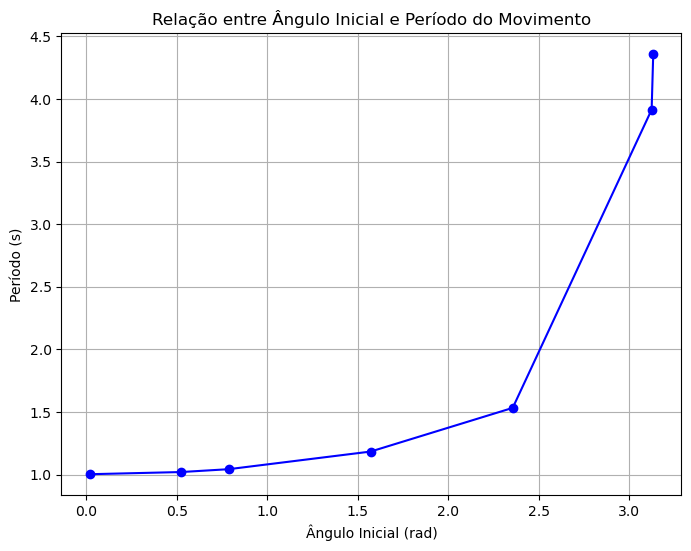

In [68]:
# Criando o gráfico
plt.figure(figsize=(8, 6))
plt.plot(theta0, periods, marker='o', linestyle='-', color='b')
plt.xlabel('Ângulo Inicial (rad)')
plt.ylabel('Período (s)')
plt.title('Relação entre Ângulo Inicial e Período do Movimento')
plt.grid(True)
plt.show()

##### c) Demonstração Numérica de Relação

Basicamente, é só comparar e fazer a conta mesmo, bem simples.

#### 4) Quarto Problema

##### a) Condições Iniciais Previstas

Desenvolvendo a equação, tem-se o seguite:

$$
    \eta = \frac{h}{mgr} \implies \eta = \frac{\frac{mr^2\dot{\Theta}^2}{2} + mgr sen(\Theta)}{mgr} > 1
$$

Logo, tem-se o seguinte:

$$
    \frac{1}{2g}r\dot{\Theta}^2 + sen(\Theta) > 1
$$

In [23]:
def omega(eta):
    return np.sqrt(2*(g/r)*(eta + 1))

theta_0 = 0
eta = 2
omega_0 = omega(eta)

z0 = [theta_0, omega_0]
t_span = (0, 10)  # tempo de 0 a 0.1 segundos


In [24]:
def normal(theta, omega):
    return m*g*np.cos(theta) + m*(r**2)*(omega**2)

In [25]:
sol = solve_ivp(model, t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))

theta_values = sol.y[0]  # valores de theta a partir da solução
omega_values = sol.y[1]  # valores de omega a partir da solução
    
m = rho * (4/3) * np.pi * r_p**3  # massa da esfera
    
potential_energies = potential_energy(theta_values)
kinetic_energies = kinetic_energy(omega_values)
total_energies = potential_energies + kinetic_energies

normal_force = normal(theta_values, omega_values)

Por fim, plotando os resultados

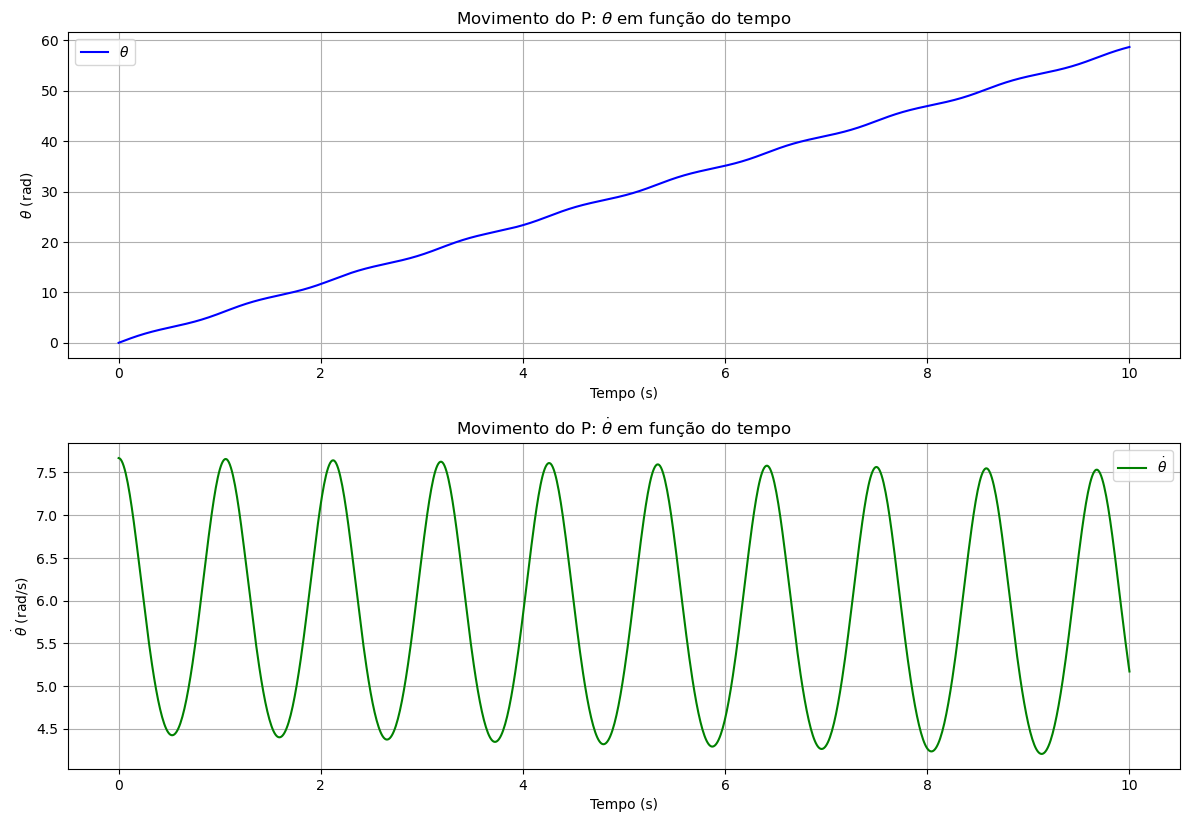

In [26]:
t_values = sol.t

# Gráficos
plt.figure(figsize=(12, 12))

# Gráfico de theta em função do tempo
plt.subplot(3, 1, 1)
plt.plot(t_values, theta_values, color='b', label=r'$\theta$')
plt.xlabel('Tempo (s)')
plt.ylabel(r'$\theta$ (rad)')
plt.title(r'Movimento do P: $\theta$ em função do tempo')
plt.grid(True)
plt.legend()

# Gráfico de velocidade angular em função do tempo
plt.subplot(3, 1, 2)
plt.plot(t_values, omega_values, color='g', label=r'$\dot{\theta}$')
plt.xlabel('Tempo (s)')
plt.ylabel(r'$\dot{\theta}$ (rad/s)')
plt.title(r'Movimento do P: $\dot{\theta}$ em função do tempo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

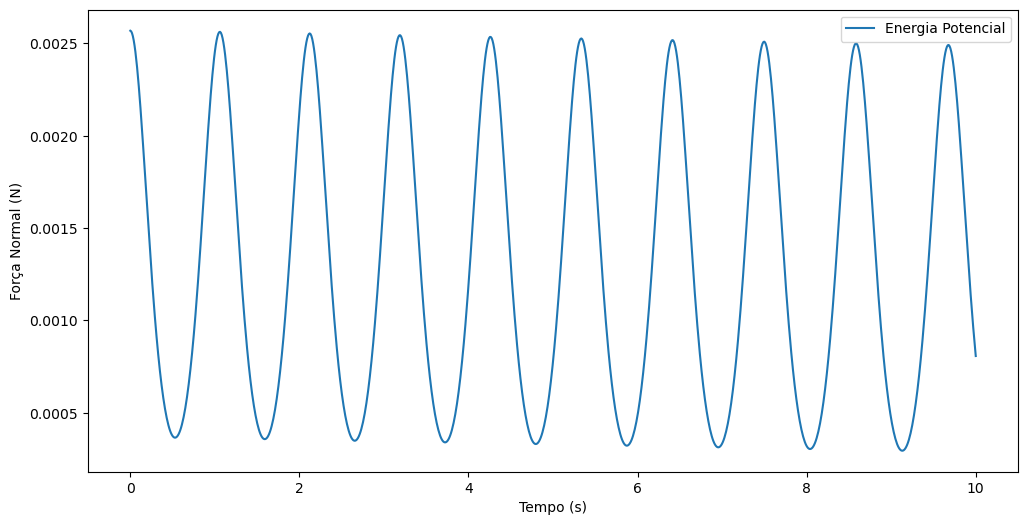

In [27]:
plt.figure(figsize=(12, 6))

plt.plot(sol.t, normal_force, label='Energia Potencial')

plt.xlabel('Tempo (s)')
plt.ylabel('Força Normal (N)')
plt.legend()
plt.show()

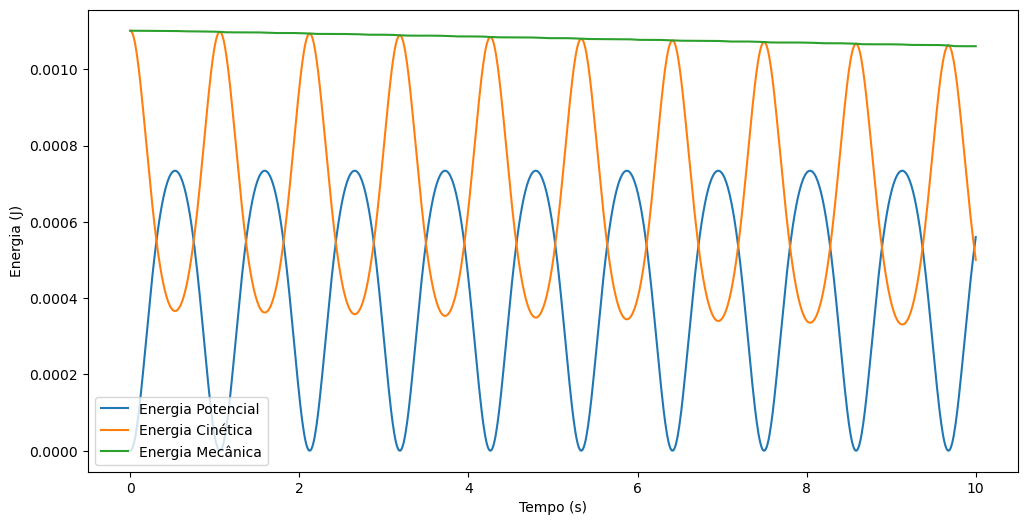

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(sol.t, potential_energies, label='Energia Potencial')
plt.plot(sol.t, kinetic_energies, label='Energia Cinética')
plt.plot(sol.t, total_energies, label='Energia Mecânica')


plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend()
plt.show()

#### 5) Quinto Problema

##### a) Função para Desenvolver o Retrato de Fases

Vamos desenvolver uma função chamada system, que descre todo os sistema do problema, ou seja, vai incluir todos os modelos possíveis para cada caso particular dependendo das condições iniciais dadas.

In [29]:
def plot_phase_portrait(model, theta_values, theta_dot_values):
    # Criar malha de pontos no espaço de fase
    theta_mesh, theta_dot_mesh = np.meshgrid(theta_values, theta_dot_values)
    field_theta, field_theta_dot = np.zeros_like(theta_mesh), np.zeros_like(theta_dot_mesh)

    # Calcular o campo vetorial em cada ponto
    for i in range(len(theta_values)):
        for j in range(len(theta_dot_values)):
            field = model(0, [theta_mesh[i, j], theta_dot_mesh[i, j]])
            field_theta[i, j] = field[0]
            field_theta_dot[i, j] = field[1]

    # Plotar as curvas de campo
    plt.streamplot(theta_mesh, theta_dot_mesh, field_theta, field_theta_dot, color='blue', linewidth=1, density=1)

    plt.xlabel('Ângulo (theta)')
    plt.ylabel('Velocidade Angular (theta_dot)')
    plt.grid(True)
    plt.show()

##### b) Desenhando o Retrato de Fase

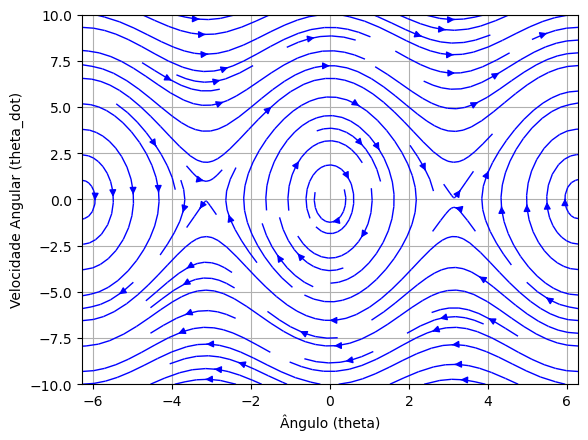

In [30]:
theta_values = np.linspace(-2*np.pi, 2*np.pi, 100)
theta_dot_values = np.linspace(-10, 10, 100)

plot_phase_portrait(model, theta_values, theta_dot_values)

##### c) Descrição

Os pontos de equilíbrio estável circundam o equilíbrio trivial, enquanto as soluções instáveis explorem para uma solução no infinito. Vale destacar também o equilíbrio instável que cirundam.

##### d) Aparição da Força Viscosa

\begin{align*}
x_1 &= \Theta
x_2 &= \dot{\Theta}
\end{align*}

As equações diferenciais do movimento podem ser escritas como:


\begin{align*}
\dot{x}_1 &= x_2 \\
\dot{x}_2 &= -\frac{g}{r}sin(x_1) - \frac{c}{r}x_2
\end{align*}

Na forma de espaço de estados, temos:


In [31]:
def model(t, z):
    theta, omega = z 
    domegadt = -(g/r)*np.sin(theta) - (c/r)*omega
    
    return [omega, domegadt]

def plot_phase_portrait(model, theta_values, theta_dot_values):
    # Criar malha de pontos no espaço de fase
    theta_mesh, theta_dot_mesh = np.meshgrid(theta_values, theta_dot_values)
    field_theta, field_theta_dot = np.zeros_like(theta_mesh), np.zeros_like(theta_dot_mesh)

    # Calcular o campo vetorial em cada ponto
    for i in range(len(theta_values)):
        for j in range(len(theta_dot_values)):
            field = model(0, [theta_mesh[i, j], theta_dot_mesh[i, j]])
            field_theta[i, j] = field[0]
            field_theta_dot[i, j] = field[1]

    # Plotar as curvas de campo
    plt.streamplot(theta_mesh, theta_dot_mesh, field_theta, field_theta_dot, color='blue', linewidth=1, density=1)

    plt.xlabel('Ângulo (theta)')
    plt.ylabel('Velocidade Angular (theta_dot)')
    plt.grid(True)
    plt.show()

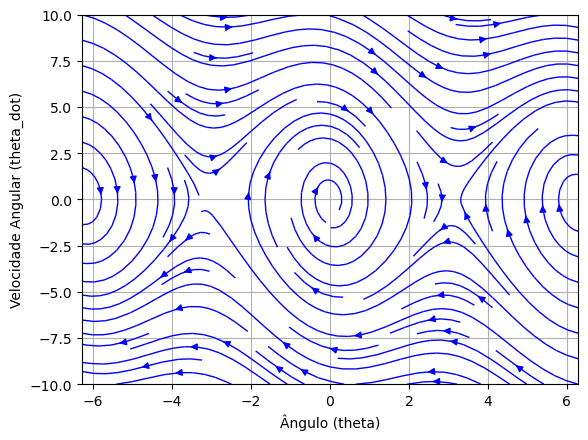

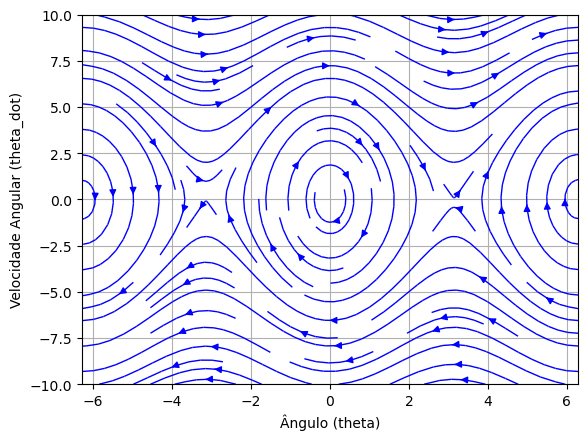

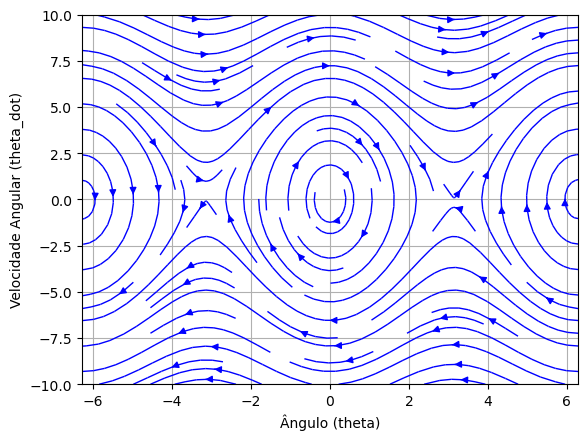

In [32]:
# Testando para diferentes valores de c
m = rho * (4/3) * np.pi * r_p**3  # massa da esfera

omega = np.sqrt(g/r) 
c_values = [0.5, 2*m*omega, 2.5*m*omega]

theta_values = np.linspace(-2*np.pi, 2*np.pi, 100)
theta_dot_values = np.linspace(-10, 10, 100)

for c_value in c_values:
    c = c_value
    plot_phase_portrait(model, theta_values, theta_dot_values)

##### e) Interpretando o Retrato de Fase com Atrito

Os pontos de sela continuam iguais. Contudo, percebe-se que existe uma espiral ao redor do ponto de equilíbrio. Devido à presença desse atrito, a esfera se move, mas tende a recair no caso de equilíbrio trivial, salvo os casos de condições iniciais extremas.

#### 6) Sexto Problema

##### a) Solução Numérica

Obtendo as velocidades angulares iniciais do problema

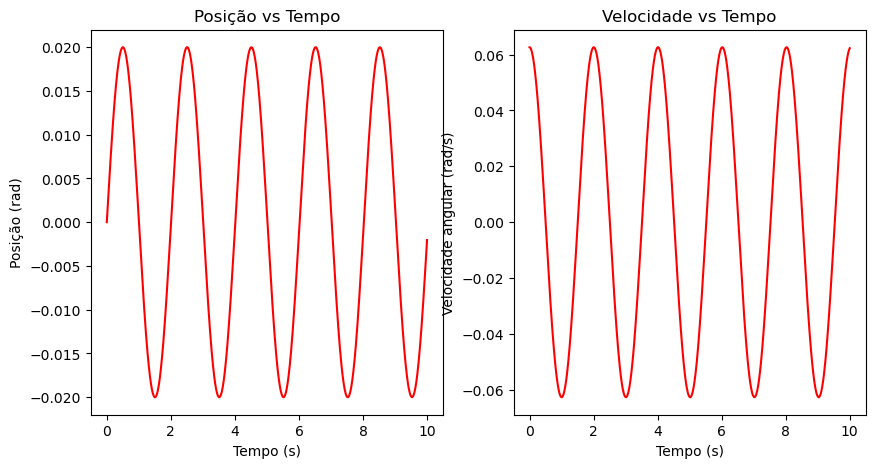

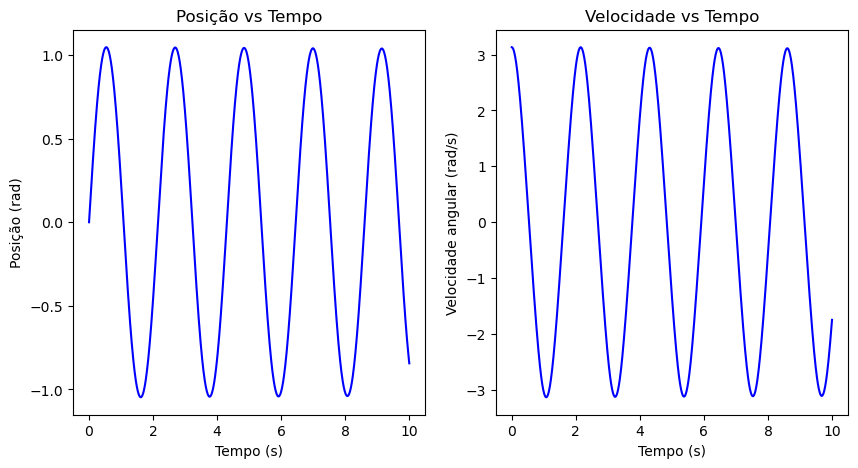

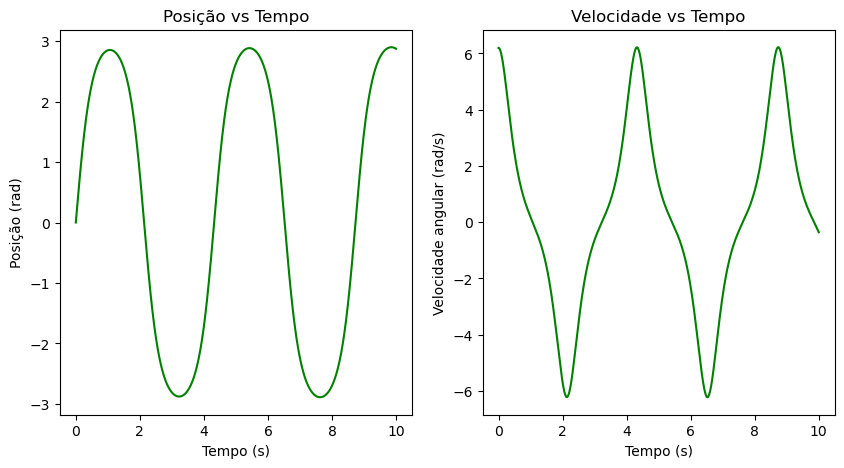

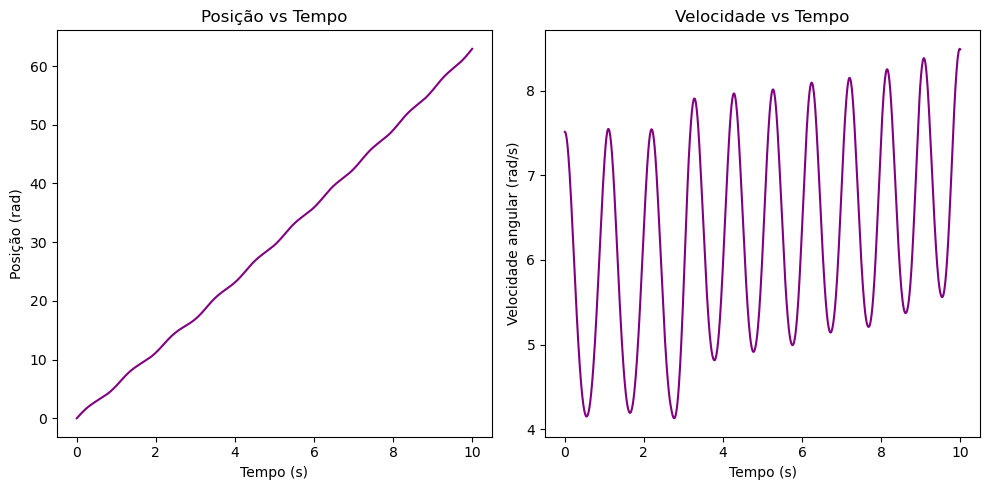

In [33]:

# Parâmetros
r = 1
g = 9.8
theta_0 = 0
k = [0.01, 0.5, 0.99, 1.2]

# Definindo a função do sistema de equações diferenciais
def pendulo(t, y):
    dydt = [y[1], -(g/r)*np.sin(y[0])]
    return dydt

# Inicializando listas para armazenar os resultados
labels = ["k=0.01", "k=0.5", "k=0.99", "k=1.2"]
colors = ['r', 'b', 'g', 'purple']

# Loop sobre os valores de k
for i in range(len(k)):
    thetap_0 = np.sqrt(4 * g * r * k[i]**2)
    y0 = [theta_0, thetap_0]
    t_span = (0, 10)
    t_eval = np.linspace(*t_span, 1000)

    # Resolvendo o sistema de equações diferenciais
    sol = solve_ivp(pendulo, t_span, y0, t_eval=t_eval, method='RK45')

    # Extraindo resultados
    theta = sol.y[0]
    thetap = sol.y[1]

    # Plotando a resposta
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(sol.t, theta, color=colors[i])
    plt.title("Posição vs Tempo")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Posição (rad)")

    plt.subplot(1, 2, 2)
    plt.plot(sol.t, thetap, color=colors[i])
    plt.title("Velocidade vs Tempo")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Velocidade angular (rad/s)")

plt.tight_layout()
plt.show()

##### b) Explicações

Basicamente, observar as funções elípticas de Jacobi correspondentes, e o caso em que o movimento estoura para o infinito. É interessante notar a relação com as questões anteriores e também com os retratos de fase.

#### 7) Sétimo Problema

##### a) Forma de Espaço de Estados

Primeiramente, a mudança de variáveis, seguida da formulação das derivadas:

\begin{equation}
    \begin{aligned} 
    s = x_1 \\
    \dot{s} = x_2 \\\\

    \dot{x_1} = x_2 \\
    \dot{x_2} = -\frac{gx_1}{4r}
    \end{aligned}
\end{equation}

Explicitamente, não foi definida uma saída para o sistema, então ficam apresentadas apenas as equações de estado

##### b) Simulações

Primeiro, deve ser, então, definido o modelo para integração, bem como os parâmetros e as condições iniciais para cada um dos três cenários solicitados.

In [34]:
# Função do modelo
def model(t, z):
    s, v = z
    dsdt = v
    dvdt = -(g/(4*r)) * s
    return [dsdt, dvdt]

In [35]:
s_0 = [0, -r/10, -4*r]
v_0 = [0, 0, 0]
z0 = list(zip(s_0, v_0)) # zip de vetores para condições iniciais

# Tempo de simulação
t_span = [0, 15]  # de 0 a 15 segundos
sol = []

for n in range(3):
    solution = solve_ivp(model, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol

Resolvido, o primeiro passo é o plot da s(t), $\dot{s}$(t), $\dot{s}$(s)

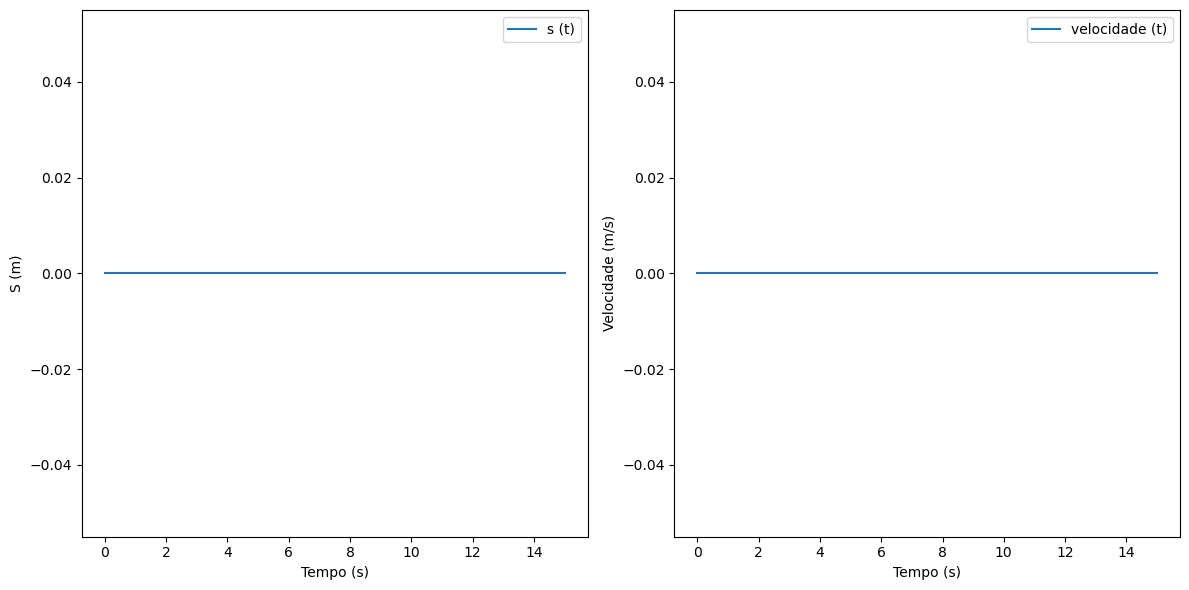

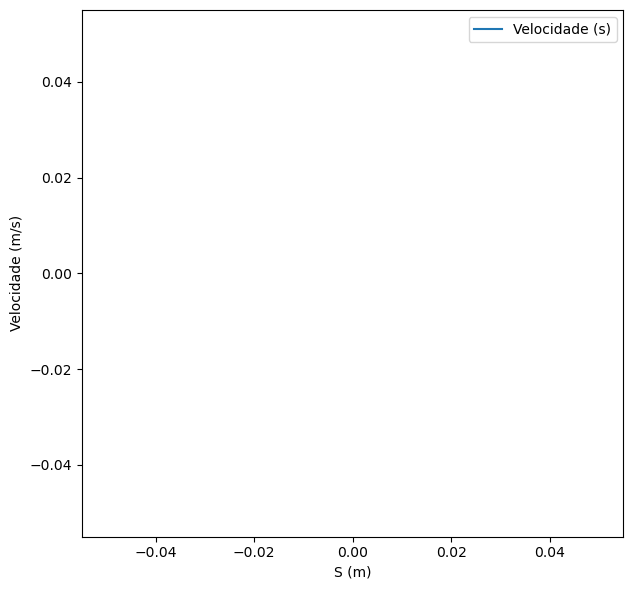

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[0].t, sol[0].y[0], label='s (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('S (m)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[0].t, sol[0].y[1], label='velocidade (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[0].y[0], sol[0].y[1], label='Velocidade (s)')
plt.xlabel('S (m)')
plt.ylabel('Velocidade (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

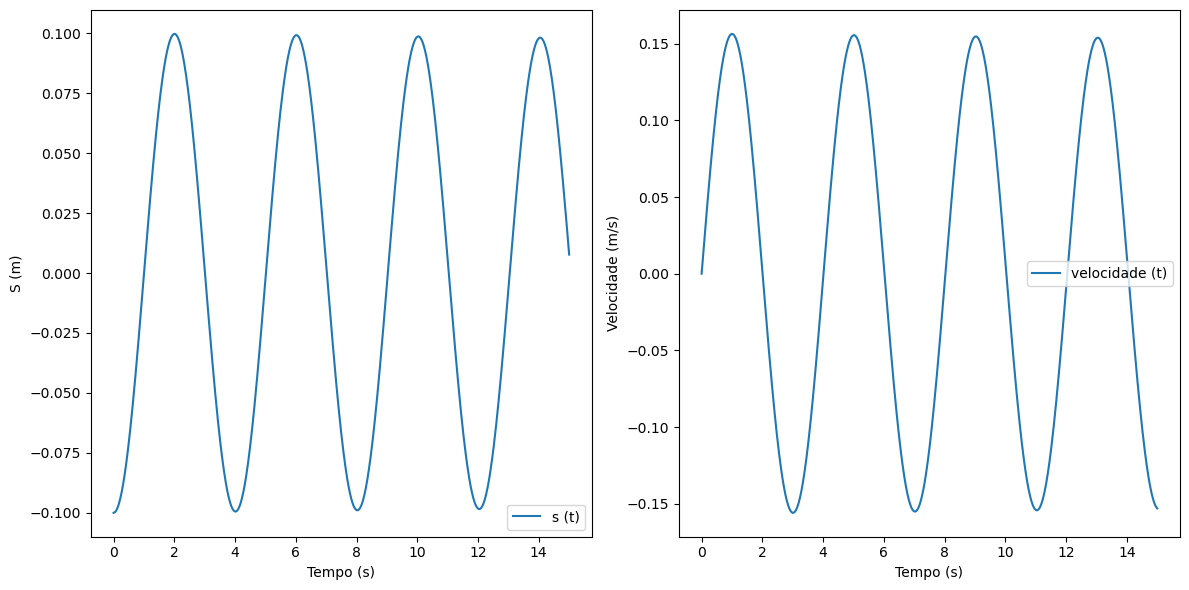

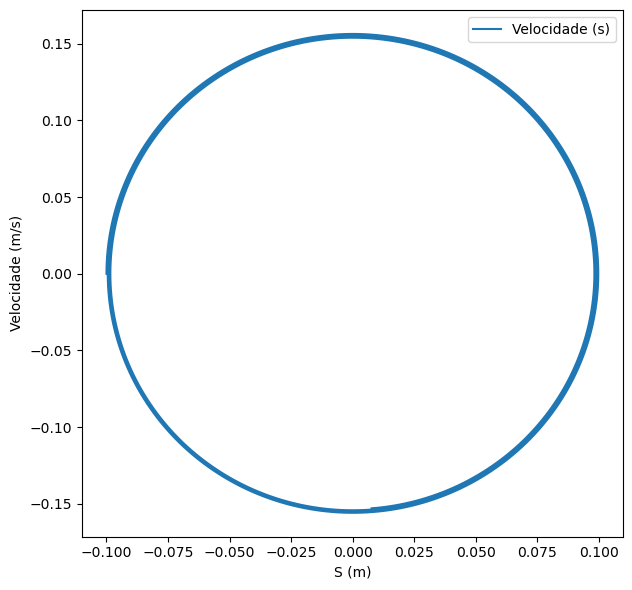

In [37]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[1].t, sol[1].y[0], label='s (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('S (m)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[1].t, sol[1].y[1], label='velocidade (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[1].y[0], sol[1].y[1], label='Velocidade (s)')
plt.xlabel('S (m)')
plt.ylabel('Velocidade (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

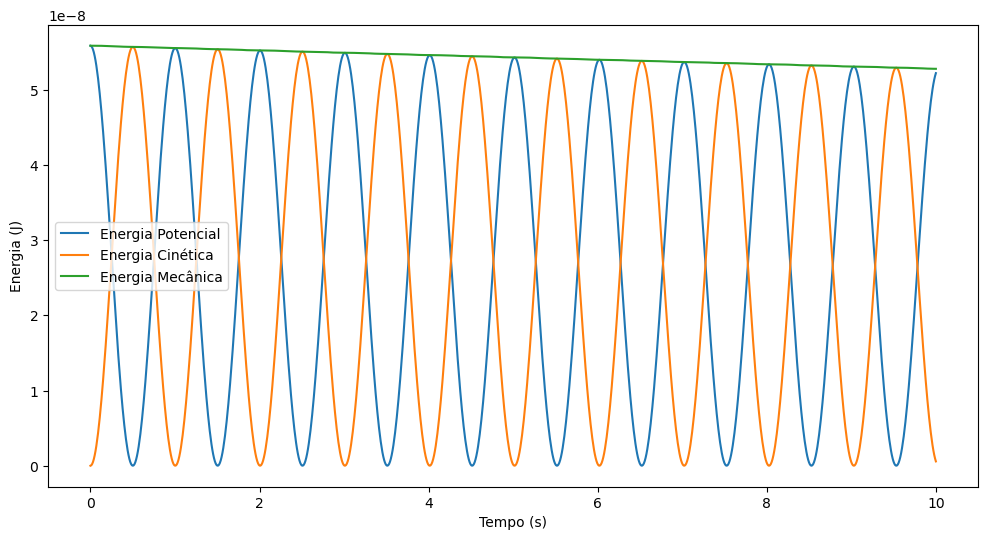

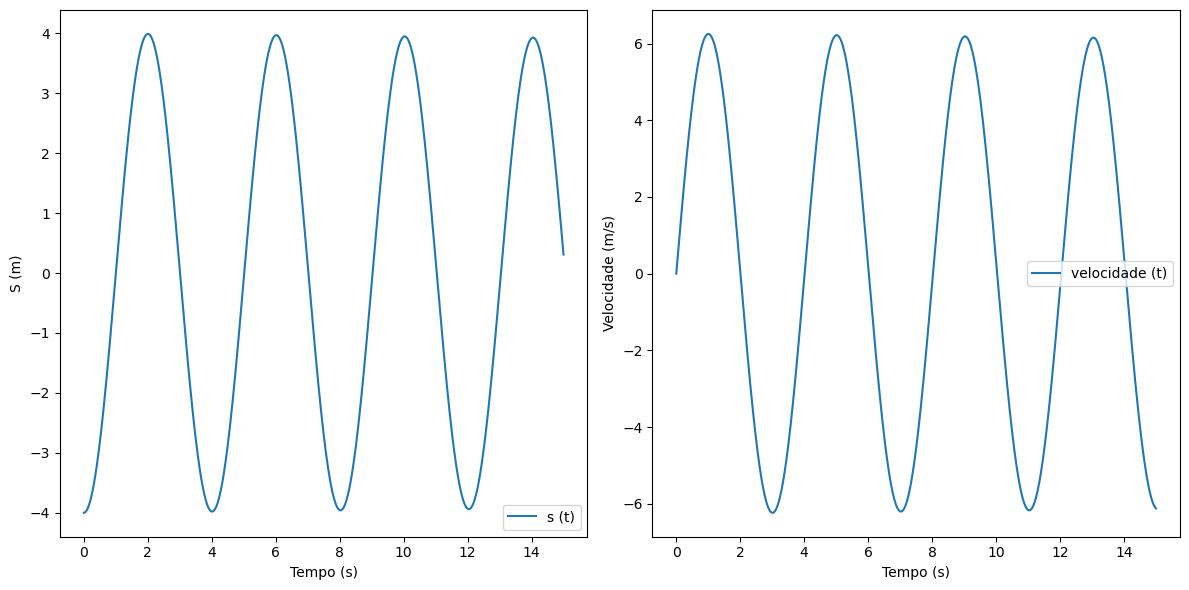

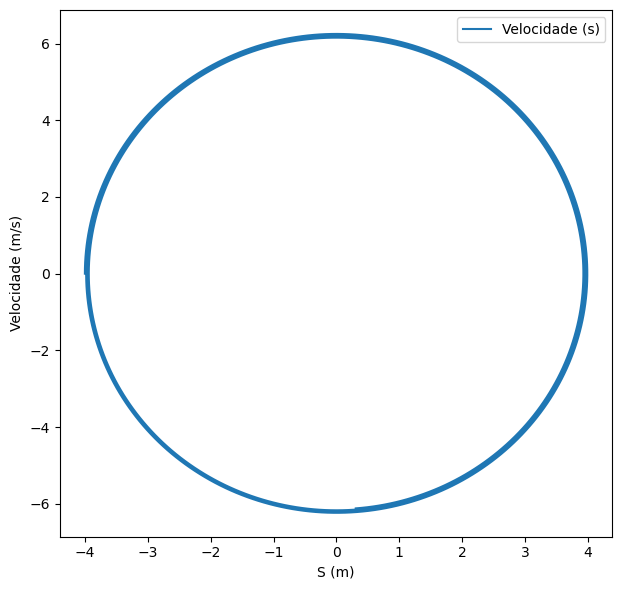

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[2].t, sol[2].y[0], label='s (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('S (m)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol[2].t, sol[2].y[1], label='velocidade (t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol[2].y[0], sol[2].y[1], label='Velocidade (s)')
plt.xlabel('S (m)')
plt.ylabel('Velocidade (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

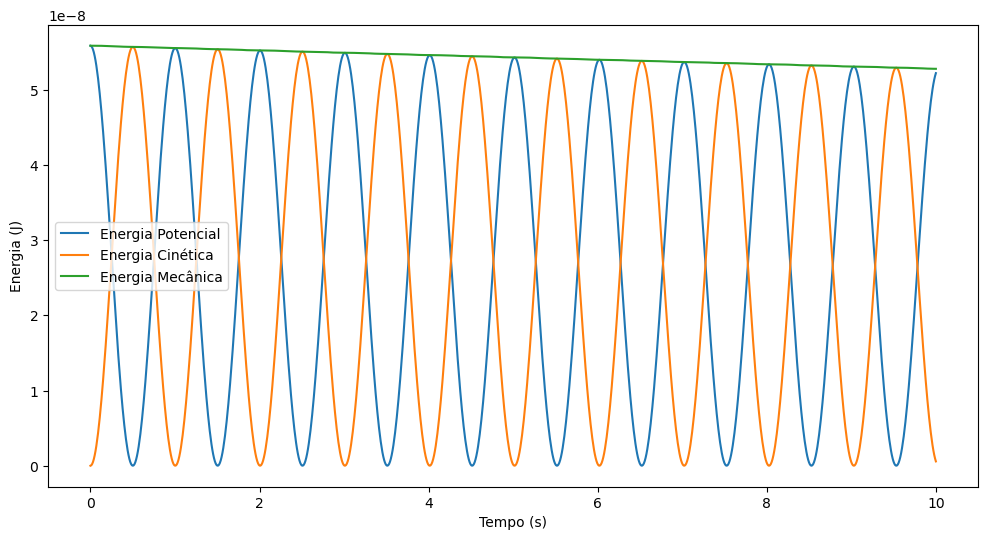

Agora, em relação à Aceleração do Sistema:

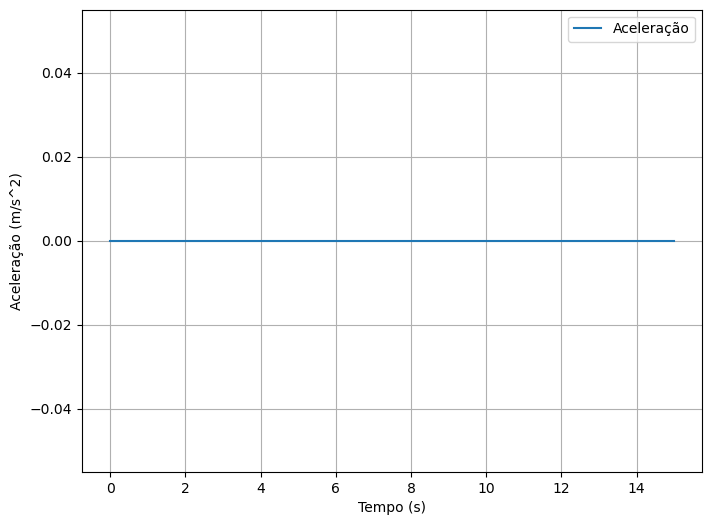

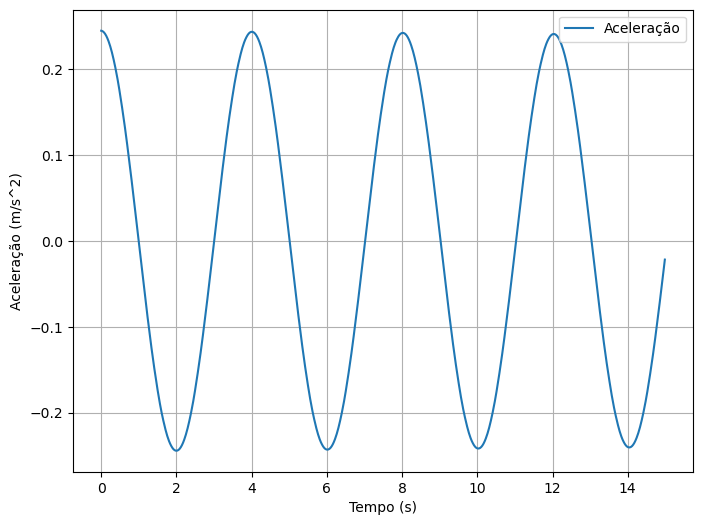

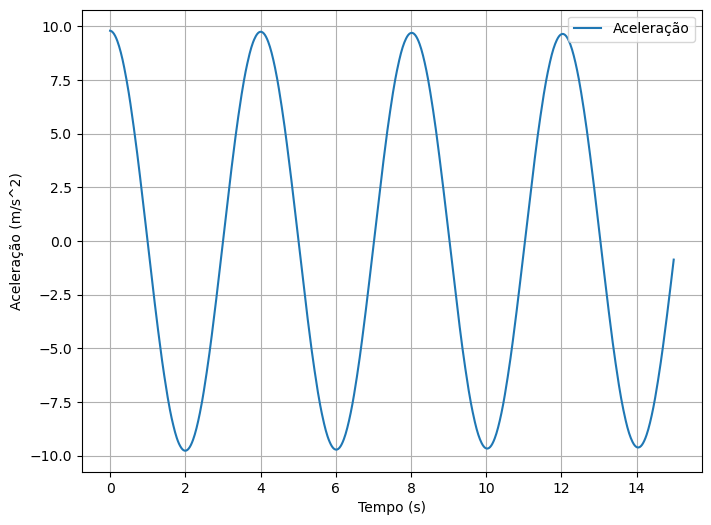

In [39]:
# Calculando a aceleração usando diferenças finitas

for solution in sol:
    t = solution.t
    v = solution.y[1]
    delta_t = t[1] - t[0]  # Intervalo de tempo entre pontos
    acceleration = np.diff(v) / delta_t  # Aceleração usando diferenças finitas

    # Removendo o último ponto de t para ter a mesma dimensão que a aceleração
    t = t[:-1]

    # Plotando a aceleração angular
    plt.figure(figsize=(8, 6))
    plt.plot(t, acceleration, label='Aceleração')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Aceleração (m/s^2)')
    plt.legend()
    plt.grid(True)
    plt.show()

##### c) Comparação de Períodos

Como ficou definido no enunciado do problema:

\begin{equation}
    \begin{aligned}
        T = 4\pi\sqrt{\frac{2r}{g}}
    \end{aligned}
\end{equation}

In [40]:
analytical_T = np.pi*4*np.sqrt((2*r)/g)
print(analytical_T)

5.676907580454914


O período é bem próximo, como pode ser visualizado nos gráficos anteriores. Também podemos pegar o valor numérico exato e calcular a diferença, algo útil para o relatório depois.

##### d) Tempo de Percurso entre Arco e Segmento (uma Comparação)

O arco AO da ciclóide é equivalente ao comprimento do diâmetro gerador, r, já definido. O comprimento do segmento pode ser obtido por teorema de pitágoras. Algo que pode ajudar é a parametrização da curva cicloide, dada por.

\begin{equation}
    \begin{aligned}
       x(\Theta) = a\Theta - asen(\Theta) \\
       y(\Theta) = a - acos(\Theta) 
    \end{aligned}
\end{equation}

Em que $\Theta$, para o problema descrito, varia de 0 a $\pi$, uma meia volta. Analogamente, a parametrização do segmento é dado por $x = x$ e $y = y$, uma simples reta no espaço.

In [41]:
# Parâmetros
g = 9.8
a = 1

# Pontos de interesse
t1 = np.pi / 4
t2 = 3 * np.pi / 4

# Tempo de descida para a meia cicloide
y1_cycloid = a * (1 - np.cos(t1))
y2_cycloid = a * (1 - np.cos(t2))
time_cycloid = np.sqrt(2 * a / g) * (np.sqrt(2 * a + y2_cycloid) - np.sqrt(2 * a + y1_cycloid))

# Tempo de descida para o segmento de reta
time_straight = np.sqrt(2 * (y2_cycloid - y1_cycloid) / g)

print(f"Tempo de descida para meia cicloide: {time_cycloid:.4f} segundos")
print(f"Tempo de descida para segmento de reta: {time_straight:.4f} segundos")

Tempo de descida para meia cicloide: 0.1857 segundos
Tempo de descida para segmento de reta: 0.5372 segundos


##### e) Partícula sai da Trajetória

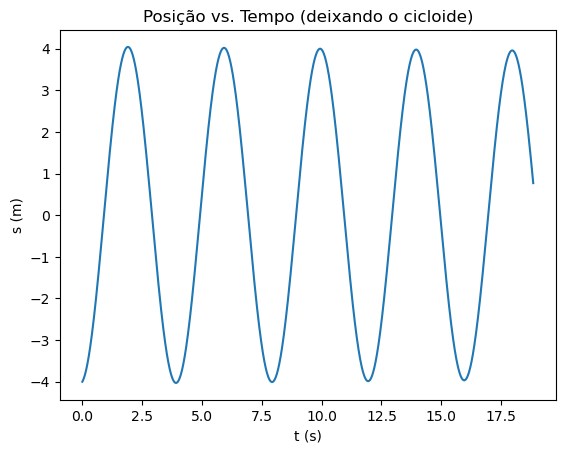

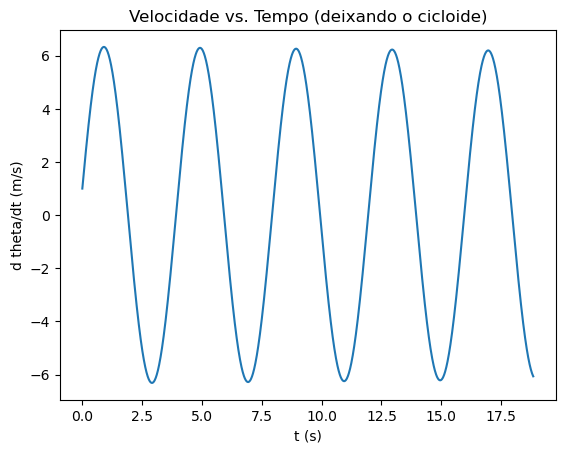

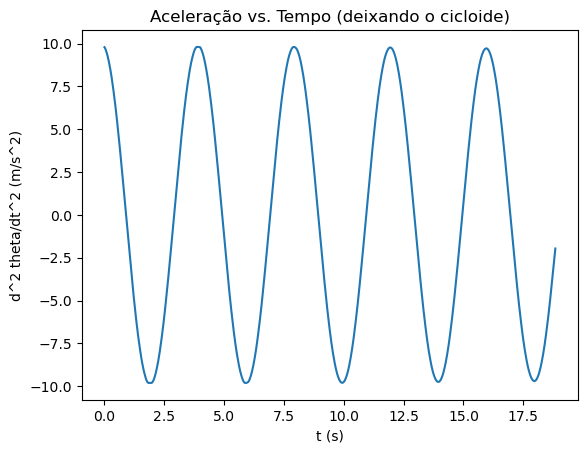

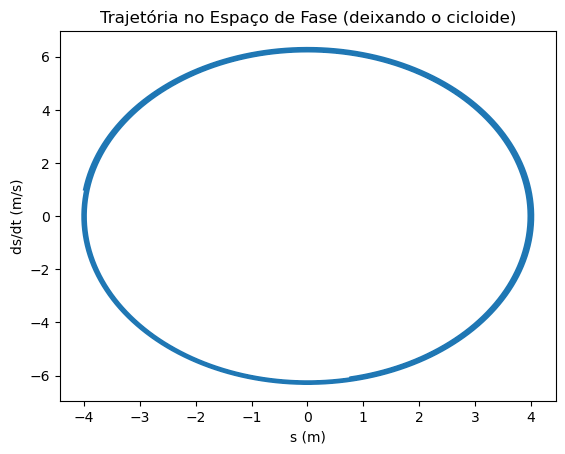

In [42]:
# Condições iniciais
y0 = [-4*r, 1]

# Tempo de simulação
ti = 0
T = np.pi  # Meio período da cicloide
tf = 6 * T
dt = 0.01
t_span = (ti, tf)
t_eval = np.arange(ti, tf, dt)

# Função do modelo
def cicloide(t, y):
    s, v = y
    a = 0.0

    if s > 4 * r:
        a = -g
    elif s < -4 * r:
        a = g
    else:
        a = -(s * g) / (4 * r)

    return [v, a]

# Resolver a equação diferencial
sol = solve_ivp(cicloide, t_span, y0, method='RK23', t_eval=t_eval)

# Resultados
s = sol.y[0]
v = sol.y[1]

# Calcular aceleração
a = np.gradient(v, dt)

# Plotar resultados
plt.figure(1)
plt.plot(sol.t, s)
plt.title("Posição vs. Tempo (deixando o cicloide)")
plt.xlabel("t (s)")
plt.ylabel("s (m)")

plt.figure(2)
plt.plot(sol.t, v)
plt.title("Velocidade vs. Tempo (deixando o cicloide)")
plt.xlabel("t (s)")
plt.ylabel("d theta/dt (m/s)")

plt.figure(3)
plt.plot(sol.t, a)
plt.title("Aceleração vs. Tempo (deixando o cicloide)")
plt.xlabel("t (s)")
plt.ylabel("d^2 theta/dt^2 (m/s^2)")

plt.figure(4)
plt.plot(s, v)
plt.title("Trajetória no Espaço de Fase (deixando o cicloide)")
plt.xlabel("s (m)")
plt.ylabel("ds/dt (m/s)")

plt.show()

#### 8) Oitavo Problema

##### a) Forma de Espaço de Estados

Como existe um sistema de duas equações diferenciais ordinárias de segundo grau, o espaço de estados vai conter 4 variáveis ao todo:

\begin{equation}
    \begin{aligned}
        x = x_1 \\
        y = x_2 \\
        \dot{x} = x_3 \\
        \dot{y} = x_4 \\\\

        \dot{x_1} = x_3 \\
        \dot{x_2} = x_4 \\
        \dot{x_3} = -\frac{k_x}{m}x_1 \\
        \dot{x_4} = -\frac{k_y}{m}x_2
        
    \end{aligned}
\end{equation}

Analogamente aos casos anteriores, não há uma saída definida, logo o espaço de estados se resume às equações acima.

##### b) Definindo as Funções (em Scilab muda um pouco, aqui é em Python)

In [43]:

# Definindo equacoes do modelo linear
def model(t, z):
    x, y, vx, vy = z

    dv_x = -(k_x/m)*x

    dv_y = -(k_y/m)*y

    return [vx, vy, dv_x, dv_y]

##### c) Primeira Rodada de Simulações

Parâmetros adotados para o primeiro caso

In [44]:
# Parâmetros do modelo
m = 0.1  # massa em kg
k_x = k_y = 5e3  # constantes de mola em N/m

Vamos definir as condições iniciais:

In [45]:
# Condições iniciais para o caso elíptico
x = 0.0004
y = 0.0003
v_x = 0.003
v_y = 0.012
z0 = [x, y, v_x, v_y]

In [46]:
# Tempo de simulação
t_span = [0, 0.1]  # de 0 a 10 segundos

# Realize a integração usando solve_ivp (M1) para o modelo não-linear
sol = solve_ivp(model, t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))

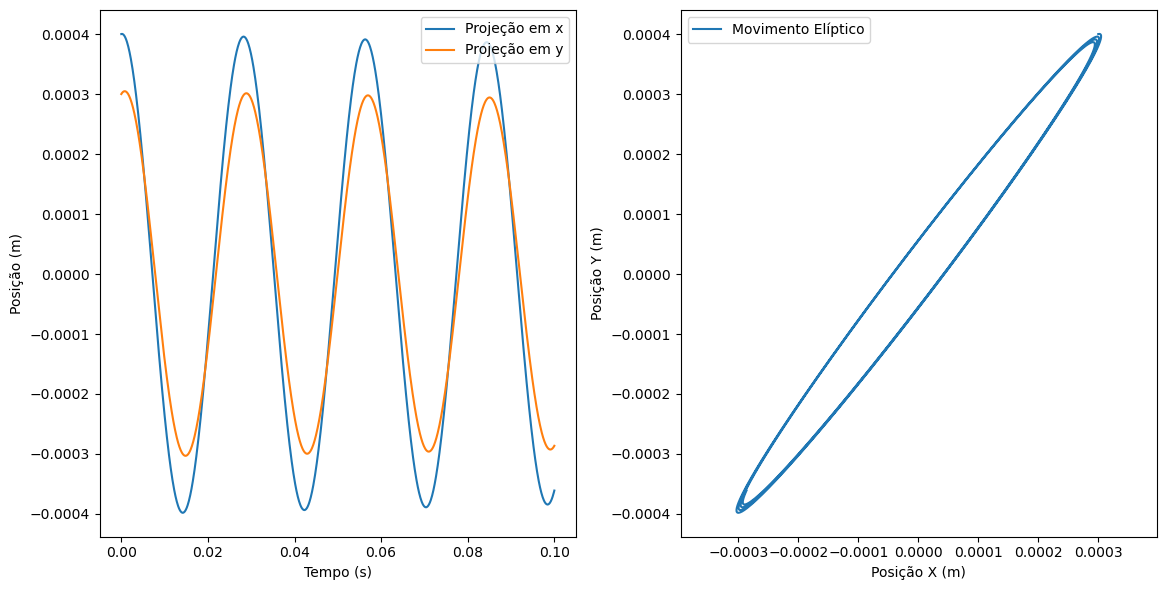

In [47]:
# Plot dos resultados para o cenário C1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='Projeção em x')
plt.plot(sol.t, sol.y[1], label='Projeção em y')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.legend()

plt.subplot(1, 2, 2)
# Utilize as variáveis x e y da projeção elíptica
plt.plot(sol.y[1], sol.y[0], label='Movimento Elíptico')
plt.xlabel('Posição X (m)')
plt.ylabel('Posição Y (m)')
plt.legend()

# Adicione a linha a seguir para garantir uma proporção de aspecto igual
plt.axis('equal')

plt.tight_layout()
plt.show()


In [48]:
# Condições iniciais para o caso degenerado
x = 0.072
y = 0.036
v_x = 0.003
v_y = 0.012
z0 = [x, y, v_x, v_y]

In [49]:
# Tempo de simulação
t_span = [0, 0.1]  # de 0 a 10 segundos

# Realize a integração usando solve_ivp (M1) para o modelo não-linear
sol_deg = solve_ivp(model, t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))

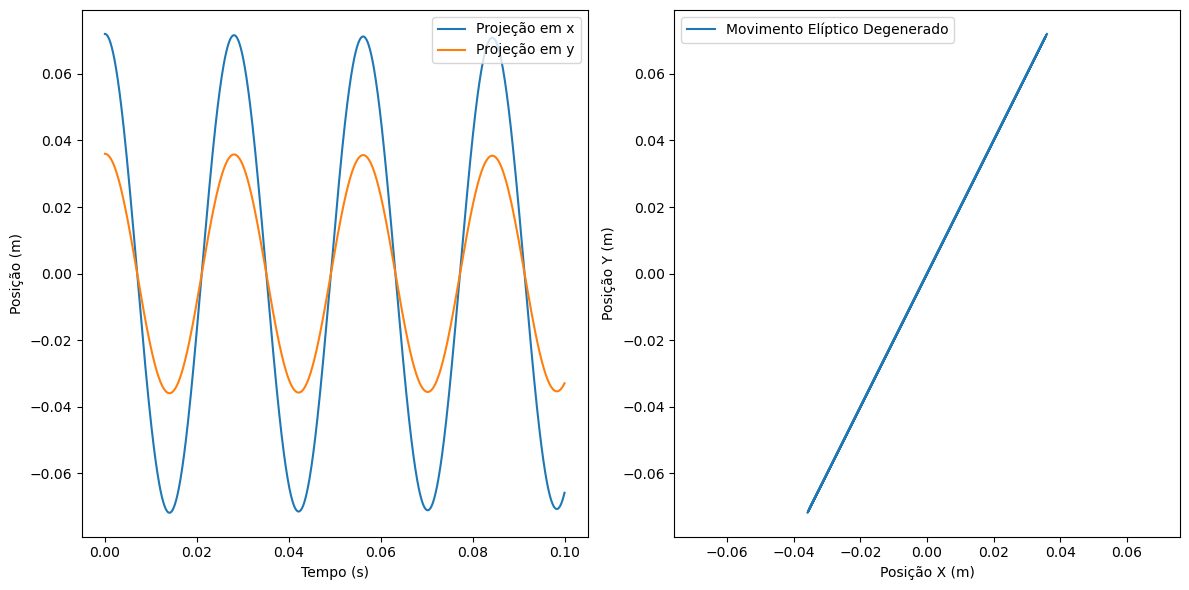

In [50]:
# Plot dos resultados para o cenário C1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol_deg.t, sol_deg.y[0], label='Projeção em x')
plt.plot(sol_deg.t, sol_deg.y[1], label='Projeção em y')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.legend()

plt.subplot(1, 2, 2)
# Utilize as variáveis x e y da projeção elíptica
plt.plot(sol_deg.y[1], sol_deg.y[0], label='Movimento Elíptico Degenerado')
plt.xlabel('Posição X (m)')
plt.ylabel('Posição Y (m)')
plt.legend()

# Adicione a linha a seguir para garantir uma proporção de aspecto igual
plt.axis('equal')

plt.tight_layout()
plt.show()


##### d) As curvas de Lissajous

Caso de n/m = 1/2

In [51]:
# Definindo parâmetros do sistema
m = 0.1  # massa em kg
k_x = 5e3  # constante da mola em N/m
k_y = k_x*(1/2) # constante da mola em N/m (como especificado)

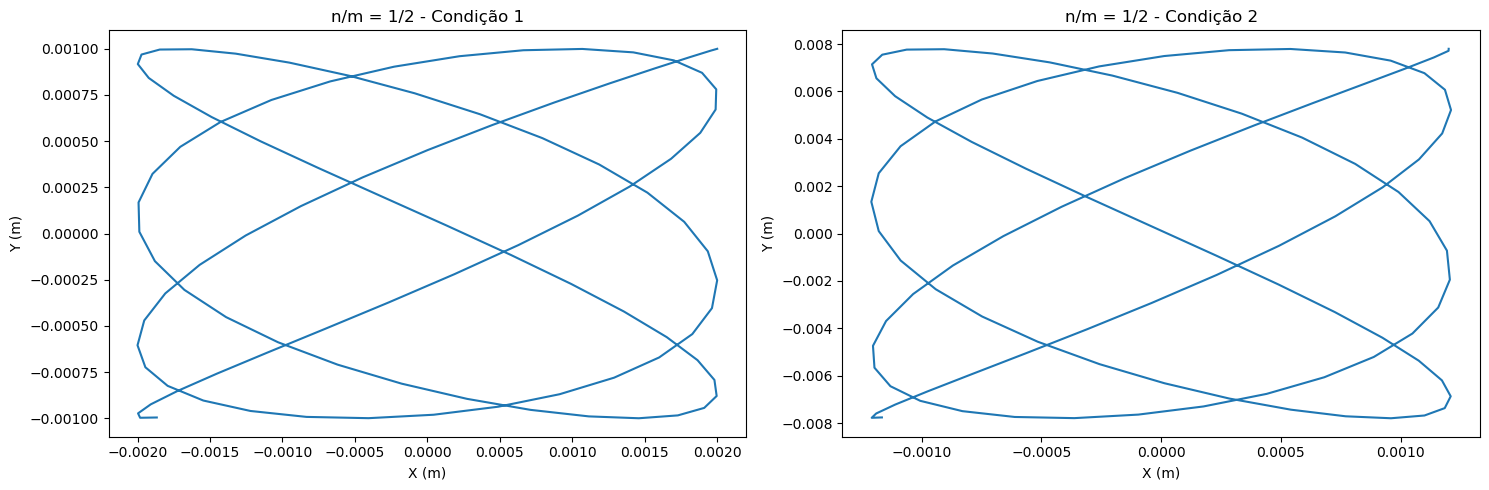

In [52]:
# Para n_m igual a 1/2
# Tempo de simulação
tempo_simulacao = (0, 0.1)  # tempo de 0 a 0.1 segundos

# Condições iniciais para R = sqrt(2) - Condição 1
posicao_inicial_x1 = 0.002  # posição inicial em metros
posicao_inicial_y1 = 0.001  # posição inicial em metros
velocidade_inicial_x1 = 0.005  # velocidade inicial em metros/segundo
velocidade_inicial_y1 = 1/2 * velocidade_inicial_x1  # mantendo R em cada caso
condicoes_iniciais1 = [posicao_inicial_x1, posicao_inicial_y1, velocidade_inicial_x1, velocidade_inicial_y1]

# Condições iniciais para R = sqrt(2) - Condição 2
posicao_inicial_x2 = 0.0012  # posição inicial em metros
posicao_inicial_y2 = 0.0078  # posição inicial em metros
velocidade_inicial_x2 = 0.03  # velocidade inicial em metros/segundo
velocidade_inicial_y2 = 1/2 * velocidade_inicial_x2  # mantendo R em cada caso
condicoes_iniciais2 = [posicao_inicial_x2, posicao_inicial_y2, velocidade_inicial_x2, velocidade_inicial_y2]

# Simulação para R = sqrt(2) - Condição 1
solucao_condicao1 = solve_ivp(model, tempo_simulacao, condicoes_iniciais1, t_eval=np.linspace(tempo_simulacao[0], tempo_simulacao[1], 100))

# Simulação para R = sqrt(2) - Condição 2
solucao_condicao2 = solve_ivp(model, tempo_simulacao, condicoes_iniciais2, t_eval=np.linspace(tempo_simulacao[0], tempo_simulacao[1], 100))

# Plotando os resultados para R = sqrt(2)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(solucao_condicao1.y[0], solucao_condicao1.y[1])
plt.title('n/m = 1/2 - Condição 1')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.subplot(1, 2, 2)
plt.plot(solucao_condicao2.y[0], solucao_condicao2.y[1])
plt.title('n/m = 1/2 - Condição 2')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.tight_layout()
plt.show()


Caso de n/m = 3/4

In [53]:
k_y = k_x*(3/4) # constante da mola em N/m (como especificado)

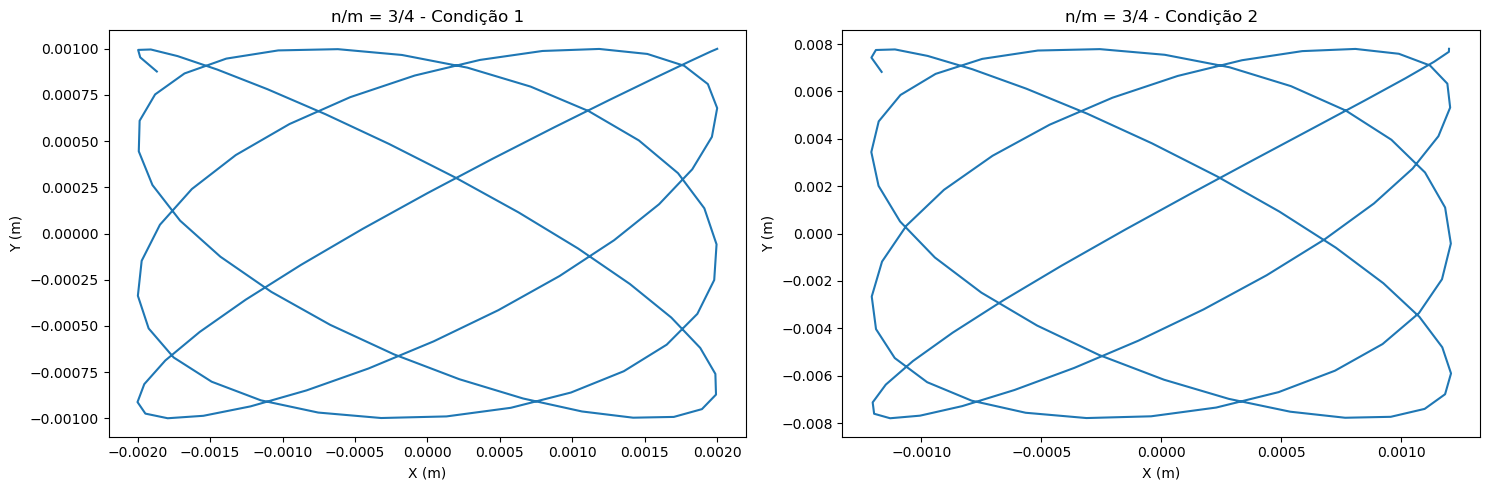

In [54]:
# Para n_m igual a 1/2
# Tempo de simulação
tempo_simulacao = (0, 0.1)  # tempo de 0 a 0.1 segundos

# Condições iniciais para R = sqrt(2) - Condição 1
posicao_inicial_x1 = 0.002  # posição inicial em metros
posicao_inicial_y1 = 0.001  # posição inicial em metros
velocidade_inicial_x1 = 0.005  # velocidade inicial em metros/segundo
velocidade_inicial_y1 = 3/4 * velocidade_inicial_x1  # mantendo R em cada caso
condicoes_iniciais1 = [posicao_inicial_x1, posicao_inicial_y1, velocidade_inicial_x1, velocidade_inicial_y1]

# Condições iniciais para R = sqrt(2) - Condição 2
posicao_inicial_x2 = 0.0012  # posição inicial em metros
posicao_inicial_y2 = 0.0078  # posição inicial em metros
velocidade_inicial_x2 = 0.03  # velocidade inicial em metros/segundo
velocidade_inicial_y2 = 3/4 * velocidade_inicial_x2  # mantendo R em cada caso
condicoes_iniciais2 = [posicao_inicial_x2, posicao_inicial_y2, velocidade_inicial_x2, velocidade_inicial_y2]

# Simulação para R = sqrt(2) - Condição 1
solucao_condicao1 = solve_ivp(model, tempo_simulacao, condicoes_iniciais1, t_eval=np.linspace(tempo_simulacao[0], tempo_simulacao[1], 100))

# Simulação para R = sqrt(2) - Condição 2
solucao_condicao2 = solve_ivp(model, tempo_simulacao, condicoes_iniciais2, t_eval=np.linspace(tempo_simulacao[0], tempo_simulacao[1], 100))

# Plotando os resultados para R = sqrt(2)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(solucao_condicao1.y[0], solucao_condicao1.y[1])
plt.title('n/m = 3/4 - Condição 1')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.subplot(1, 2, 2)
plt.plot(solucao_condicao2.y[0], solucao_condicao2.y[1])
plt.title('n/m = 3/4 - Condição 2')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.tight_layout()
plt.show()


Para n/m = 7/9

In [55]:
k_y = k_x*(7/9) # constante da mola em N/m (como especificado)

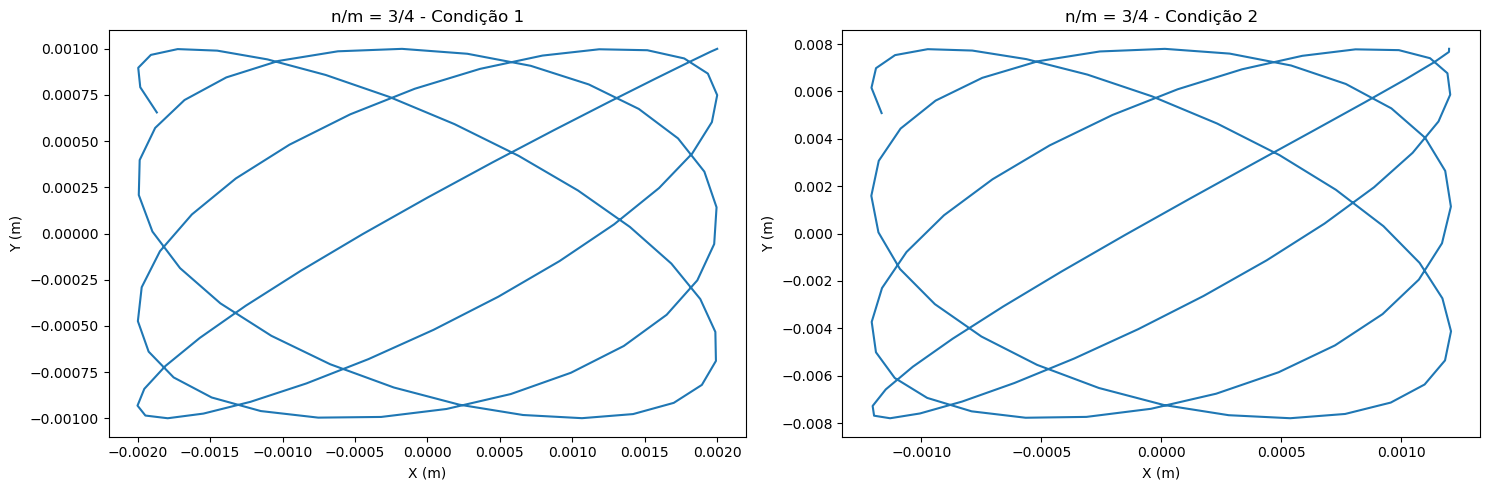

In [56]:
# Para n_m igual a 1/2
# Tempo de simulação
t_span = (0, 0.1)  # tempo de 0 a 0.1 segundos

# Condições iniciais para R = sqrt(2) - Condição 1
x0_sqrt2_1 = 0.002  # posição inicial em metros
y0_sqrt2_1 = 0.001  # posição inicial em metros
vx0_sqrt2_1 = 0.005  # velocidade inicial em metros/segundo
vy0_sqrt2_1 = 7/9 * vx0_sqrt2_1  # mantendo R em cada caso
z0_sqrt2_1 = [x0_sqrt2_1, y0_sqrt2_1, vx0_sqrt2_1, vy0_sqrt2_1]

# Condições iniciais para R = sqrt(2) - Condição 2
x0_sqrt2_2 = 0.0012  # posição inicial em metros
y0_sqrt2_2 = 0.0078  # posição inicial em metros
vx0_sqrt2_2 = 0.03  # velocidade inicial em metros/segundo
vy0_sqrt2_2 = 7/9 * vx0_sqrt2_2  # mantendo R em cada caso
z0_sqrt2_2 = [x0_sqrt2_2, y0_sqrt2_2, vx0_sqrt2_2, vy0_sqrt2_2]

# Simulação para R = sqrt(2) - Condição 1
sol_sqrt2_1 = solve_ivp(model, t_span, z0_sqrt2_1, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Simulação para R = sqrt(2) - Condição 2
sol_sqrt2_2 = solve_ivp(model, t_span, z0_sqrt2_2, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Plotando os resultados para R = sqrt(2)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(sol_sqrt2_1.y[0], sol_sqrt2_1.y[1])
plt.title('n/m = 3/4 - Condição 1')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.subplot(1, 2, 2)
plt.plot(sol_sqrt2_2.y[0], sol_sqrt2_2.y[1])
plt.title('n/m = 3/4 - Condição 2')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.tight_layout()
plt.show()

##### e) Curvas Abertas 

Para o caso de raiz de 2

In [57]:
# Definindo parâmetros do sistema
m = 0.1  # massa em kg
k_x = 5e3  # constante da mola em N/m
R_sqrt2 = np.sqrt(2)  # R = sqrt(2)
k_y = k_x * R_sqrt2  # constante da mola em N/m (R = sqrt(2))

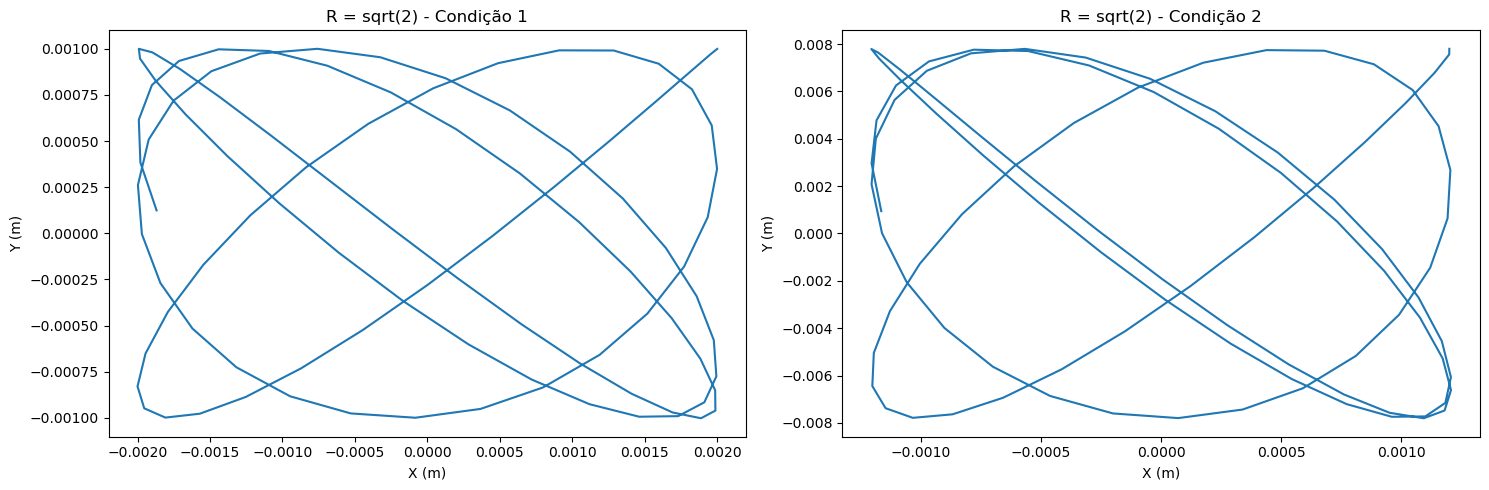

In [58]:
# Tempo de simulação
t_span = (0, 0.1)  # tempo de 0 a 0.1 segundos

# Condições iniciais para R = sqrt(2) - Condição 1
x0_sqrt2_1 = 0.002  # posição inicial em metros
y0_sqrt2_1 = 0.001  # posição inicial em metros
vx0_sqrt2_1 = 0.005  # velocidade inicial em metros/segundo
vy0_sqrt2_1 = R_sqrt2 * vx0_sqrt2_1  # mantendo R em cada caso
z0_sqrt2_1 = [x0_sqrt2_1, y0_sqrt2_1, vx0_sqrt2_1, vy0_sqrt2_1]

# Condições iniciais para R = sqrt(2) - Condição 2
x0_sqrt2_2 = 0.0012  # posição inicial em metros
y0_sqrt2_2 = 0.0078  # posição inicial em metros
vx0_sqrt2_2 = 0.03  # velocidade inicial em metros/segundo
vy0_sqrt2_2 = R_sqrt2 * vx0_sqrt2_2  # mantendo R em cada caso
z0_sqrt2_2 = [x0_sqrt2_2, y0_sqrt2_2, vx0_sqrt2_2, vy0_sqrt2_2]

# Simulação para R = sqrt(2) - Condição 1
sol_sqrt2_1 = solve_ivp(model, t_span, z0_sqrt2_1, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Simulação para R = sqrt(2) - Condição 2
sol_sqrt2_2 = solve_ivp(model, t_span, z0_sqrt2_2, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Plotando os resultados para R = sqrt(2)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(sol_sqrt2_1.y[0], sol_sqrt2_1.y[1])
plt.title('R = sqrt(2) - Condição 1')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.subplot(1, 2, 2)
plt.plot(sol_sqrt2_2.y[0], sol_sqrt2_2.y[1])
plt.title('R = sqrt(2) - Condição 2')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.tight_layout()
plt.show()

Para o caso do número de Euler

In [59]:
R_euler = np.exp(1)  # R = e
k_y = k_x * R_euler  # constante da mola em N/m (R = e)

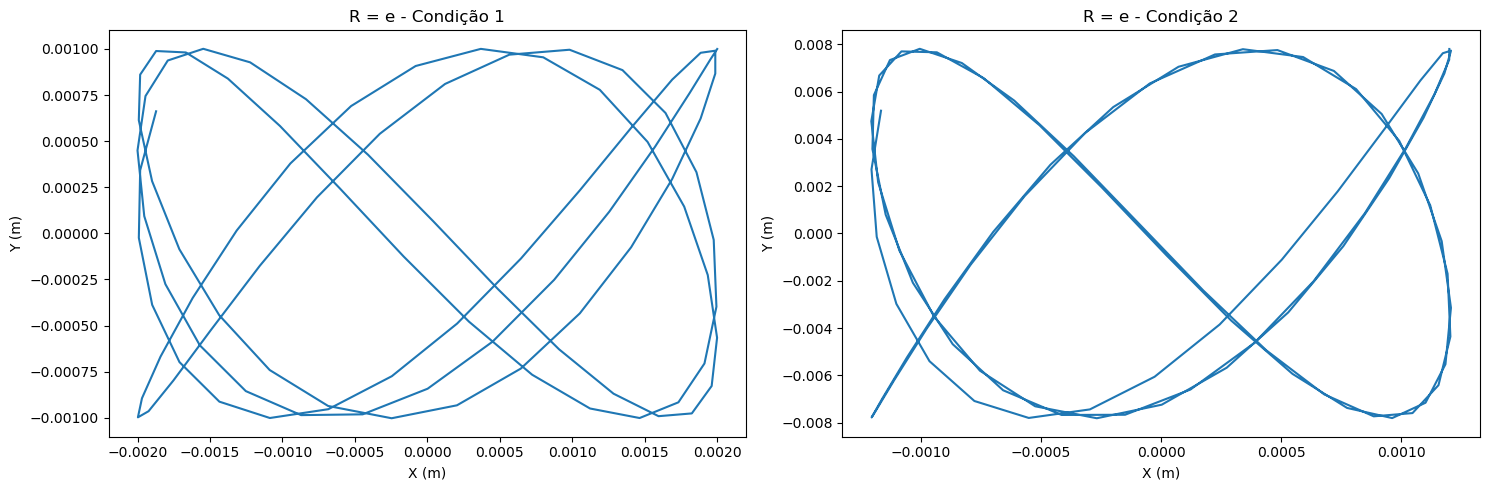

In [60]:
# Tempo de simulação
t_span = (0, 0.1)  # tempo de 0 a 0.1 segundos

# Condições iniciais para R = e - Condição 1
x0_euler_1 = 0.002  # posição inicial em metros
y0_euler_1 = 0.001  # posição inicial em metros
vx0_euler_1 = 0.005  # velocidade inicial em metros/segundo
vy0_euler_1 = R_euler * vx0_euler_1  # mantendo R em cada caso
z0_euler_1 = [x0_euler_1, y0_euler_1, vx0_euler_1, vy0_euler_1]

# Condições iniciais para R = e - Condição 2
x0_euler_2 = 0.0012  # posição inicial em metros
y0_euler_2 = 0.0078  # posição inicial em metros
vx0_euler_2 = 0.03  # velocidade inicial em metros/segundo
vy0_euler_2 = R_euler * vx0_euler_2  # mantendo R em cada caso
z0_euler_2 = [x0_euler_2, y0_euler_2, vx0_euler_2, vy0_euler_2]

# Simulação para R = e - Condição 1
sol_euler_1 = solve_ivp(model, t_span, z0_euler_1, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Simulação para R = e - Condição 2
sol_euler_2 = solve_ivp(model, t_span, z0_euler_2, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Plotando os resultados para R = e
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(sol_euler_1.y[0], sol_euler_1.y[1])
plt.title('R = e - Condição 1')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.subplot(1, 2, 2)
plt.plot(sol_euler_2.y[0], sol_euler_2.y[1])
plt.title('R = e - Condição 2')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.tight_layout()
plt.show()